In [2]:
GOOGLE_KG_API_KEY_FILEPATH = "C:/Users/Connie/Downloads/proj2/kg_api_key.txt"
GOOGLE_KG_SERVICE_URL = "https://kgsearch.googleapis.com/v1/entities:search"

GOOGLE_API_KEY_FILEPATH = "C:/Users/Connie/Downloads/proj2/GOOGLE_API_KEY.txt"
GOOGLE_CSE_ID_FILEPATH = "C:/Users/Connie/Downloads/proj2/GOOGLE_CSE_ID.txt"

GOOGLE_APPLICATIONS_KEY_FILEPATH = "C:/Users/Connie/Downloads/proj2/google_application_key.json"

GOOGLE_KG_STATUTES_INFO_FOLDER_PATH = "C:/Users/Connie/Downloads/proj2/google_kg_statues"
WIKI_INFOBOX_FOLDER_PATH = "C:/Users/Connie/Downloads/proj2/wiki_infobox"

CORE_ACT_QUESTIONS_FILEPATH = "C:/Users/Connie/Downloads/proj2/CORE_ACT_QUESTIONS"
GOOGLE_QA_RESULTS_FOLDER_PATH = "C:/Users/Connie/Downloads/proj2/qa_act_results"

## PROJECT-2: Knowledge Graphs for Knowledge Mining

### Part-1: Exploring the Limits of the Knowledge Graph Search API
+ Create [Google Knowledge Graph Service API KEY](href="https://developers.google.com/knowledge-graph/prereqs#project")
+ Save the `api_key` in a file; remember the full filepath.
+ Use this filepath to update the value for `GOOGLE_KG_API_KEY_FILEPATH`

In [2]:
from __future__ import print_function
import json
import urllib
import pprint
import requests

In [3]:
def query_google_kg(query, service_url = GOOGLE_KG_SERVICE_URL,
                    api_key_filepath = GOOGLE_KG_API_KEY_FILEPATH, 
                    limit = 100, pjson = False):
    
    api_key = open(api_key_filepath).read().strip()
    params = {
        'query': query,
        'limit': limit,
        'indent': True,
        'key': api_key
    }

    url = service_url + '?' +  urllib.parse.urlencode(params)
    response = json.loads(urllib.request.urlopen(url).read())
    results = response['itemListElement']
    if pjson: pprint.pprint(results)
    return results

def display_google_KG_results(query, result_list):
    print("\n")
    print("*"*50)
    print(len(result_list), "Results for query: ", query)
    print("*"*50)
    for item in result_list:
        result = item['result']
        keys = result.keys()
        if result and 'name' in keys:
            print("Name: ", result['name'])
        if result and 'description' in keys:
            print("Description: ", result['description'])
        if result and '@type' in keys:
            print("Type: ", result['@type'])
        if result and '@id' in keys:
            print("ID: ", result['@id'])
        if result and 'detailedDescription' in keys:
            details = result['detailedDescription']
            details_keys = details.keys()
            if details and 'url' in details_keys:
                print("URL: ", details['url'])
            if details and 'articleBody' in details_keys:
                print("Article Body: ", details['articleBody'])
            
        print("-"*30)
    return

In [4]:
query = 'Credit Card Act'
# query = "18 U.S.C. §§ 2510, 2511 (US)"
results = query_google_kg (query, pjson = True)

[{'@type': 'EntitySearchResult',
  'result': {'@id': 'kg:/m/05zx95z',
             '@type': ['Book', 'Thing'],
             'detailedDescription': {'articleBody': 'The Credit Card '
                                                    'Accountability '
                                                    'Responsibility and '
                                                    'Disclosure Act of 2009 is '
                                                    'a federal statute passed '
                                                    'by the United States '
                                                    'Congress and signed by '
                                                    'U.S. President Barack '
                                                    'Obama on May 22, 2009. ',
                                     'license': 'https://en.wikipedia.org/wiki/Wikipedia:Text_of_Creative_Commons_Attribution-ShareAlike_3.0_Unported_License',
                                     'url':

In [5]:
display_google_KG_results (query, results[0:3])



**************************************************
3 Results for query:  Credit Card Act
**************************************************
Name:  Credit CARD Act of 2009
Type:  ['Book', 'Thing']
ID:  kg:/m/05zx95z
URL:  https://en.wikipedia.org/wiki/Credit_CARD_Act_of_2009
Article Body:  The Credit Card Accountability Responsibility and Disclosure Act of 2009 is a federal statute passed by the United States Congress and signed by U.S. President Barack Obama on May 22, 2009. 
------------------------------
Name:  Discover Financial Services
Description:  Financial services company
Type:  ['Organization', 'Corporation', 'Thing']
ID:  kg:/m/02wydsr
URL:  https://en.wikipedia.org/wiki/Discover_Financial
Article Body:  Discover Financial Services is an American financial services company that owns and operates Discover Bank, which offers checking and savings accounts, personal loans, home equity loans, student loans and credit cards. 
------------------------------
Name:  Fair Credit and

In [6]:
query = "California Consumer Privacy Act of 2018"
results = query_google_kg (query, pjson = False)

In [7]:
results

[{'resultScore': 45.54022979736328,
  '@type': 'EntitySearchResult',
  'result': {'@id': 'kg:/g/11fhr0_x97',
   '@type': ['Thing', 'Book'],
   'detailedDescription': {'license': 'https://en.wikipedia.org/wiki/Wikipedia:Text_of_Creative_Commons_Attribution-ShareAlike_3.0_Unported_License',
    'articleBody': 'The California Consumer Privacy Act is a state statute intended to enhance privacy rights and consumer protection for residents of California, United States. ',
    'url': 'https://en.wikipedia.org/wiki/California_Consumer_Privacy_Act'},
   'name': 'California Consumer Privacy Act'}},
 {'resultScore': 0.5045601725578308,
  'result': {'@type': ['Thing', 'Organization', 'Corporation'],
   'name': 'Apple',
   'url': 'http://www.apple.com/it/',
   'description': 'Technology company',
   '@id': 'kg:/m/0k8z',
   'detailedDescription': {'url': 'https://en.wikipedia.org/wiki/Apple_Inc.',
    'license': 'https://en.wikipedia.org/wiki/Wikipedia:Text_of_Creative_Commons_Attribution-ShareAlike

In [8]:
new = ['Event', 'Thing']

In [9]:
if new  in results[0]['result']['@type']:
    print('yes')

In [10]:
 results[:2]

[{'resultScore': 45.54022979736328,
  '@type': 'EntitySearchResult',
  'result': {'@id': 'kg:/g/11fhr0_x97',
   '@type': ['Thing', 'Book'],
   'detailedDescription': {'license': 'https://en.wikipedia.org/wiki/Wikipedia:Text_of_Creative_Commons_Attribution-ShareAlike_3.0_Unported_License',
    'articleBody': 'The California Consumer Privacy Act is a state statute intended to enhance privacy rights and consumer protection for residents of California, United States. ',
    'url': 'https://en.wikipedia.org/wiki/California_Consumer_Privacy_Act'},
   'name': 'California Consumer Privacy Act'}},
 {'resultScore': 0.5045601725578308,
  'result': {'@type': ['Thing', 'Organization', 'Corporation'],
   'name': 'Apple',
   'url': 'http://www.apple.com/it/',
   'description': 'Technology company',
   '@id': 'kg:/m/0k8z',
   'detailedDescription': {'url': 'https://en.wikipedia.org/wiki/Apple_Inc.',
    'license': 'https://en.wikipedia.org/wiki/Wikipedia:Text_of_Creative_Commons_Attribution-ShareAlike

In [11]:
display_google_KG_results (query, results[:2])



**************************************************
2 Results for query:  California Consumer Privacy Act of 2018
**************************************************
Name:  California Consumer Privacy Act
Type:  ['Thing', 'Book']
ID:  kg:/g/11fhr0_x97
URL:  https://en.wikipedia.org/wiki/California_Consumer_Privacy_Act
Article Body:  The California Consumer Privacy Act is a state statute intended to enhance privacy rights and consumer protection for residents of California, United States. 
------------------------------
Name:  Apple
Description:  Technology company
Type:  ['Thing', 'Organization', 'Corporation']
ID:  kg:/m/0k8z
URL:  https://en.wikipedia.org/wiki/Apple_Inc.
Article Body:  Apple Inc. is an American multinational technology company that specializes in consumer electronics, computer software, and online services. 
------------------------------


In [12]:
query_question = 'What is a federal garnishment?'
query_noun_phrase = "federal garnishment"
results_question = query_google_kg (query_question)
results_noun_phrase = query_google_kg (query_noun_phrase)

In [13]:
display_google_KG_results (query_question, results_question)
display_google_KG_results (query_noun_phrase, results_noun_phrase)



**************************************************
1 Results for query:  What is a federal garnishment?
**************************************************
Name:  Individual employee rights in a nutshell
Type:  ['Book', 'Thing']
ID:  kg:/m/06hhsjx
------------------------------


**************************************************
4 Results for query:  federal garnishment
**************************************************
Name:  Complete guide to federal and state garnishment
Description:  Book by Amorette Nelson Bryant
Type:  ['Book', 'Thing']
ID:  kg:/m/06fw49d
------------------------------
Name:  Federal Benefit Payments Garnishment Requirements
Type:  ['Thing', 'Event']
ID:  kg:/g/11fmlj_pq9
------------------------------
Name:  Federal and state garnishment
Type:  ['Book', 'Thing']
ID:  kg:/m/068mf5y
------------------------------
Name:  Federal Benefit Payments Garnishment Requirements
Type:  ['Thing', 'Event']
ID:  kg:/g/11fqq28ttb
------------------------------


In [14]:
# Other query examples to play with
query = 'What is a federal garnishment?'
query = "federal garnishment"

query = 'google'
query = 'types of bribery'
query = 'Fair and Accurate Credit Transaction Act'
query = "truth lending"
query = 'Equal Credit Opportunity Act '
query = 'What is a federal garnishment?'
query = "Fair Credit Billing Act"
query = "educational loans"
query = "consumer finance lending"
query = "Credit Card Act"
query = "Credit Card Accountability"
query = "Affton Chamber of Commerce"

_Observations_:
+ If `ID` includes `/g/`, then it is specific to private knowledge and will not be open:
    - Namely, the `/g/` entities are internal to Google and don't tend to be exposed through the Knowledge Graph API.
    - Check if the result is provate, and only show the public result that are more likely contain information.
+ If `ID` includes `/m/`, then it is open source knowledge and some info will be available.
+ Use the `Type` information to filter out pages about irrelevant entities, such as 'Organization', 'Event', 'Corporation':
    - Create an `EXCLUDE_TYPE_LIST` to check which specific query results of interest to display
+ The same query on the Google Search results from the browser displays different content from what can be see using the Google KG Service API:
    - To augment info provided by the Google KG Service API, parse and extract information from the Wikipedia's `Infobox` for the given wiki `URL` provided by the KG Service API.
+ Google KG only queries the Entities in the KG:
    - For queries that are full questions vs. entity noun phrases, the behavior of the service if different. Basically, Google KG API is not a Question Answering system.

__Part-1: SUBMIT INSTRUCTIONS__

+ Write the `filter_google_kg_query_results()` function according to specifications
+ For every Statute in the `Banking_Statues.xlsx` and `DataPrivacy.xlsx`, generate relevant information using your filter:
    - Save the results in the folder `GOOGLE_KG_STATUTES_INFO_FOLDER_PATH`:
    - Make sure that the folder exists, if not, then create the folder first (using `os` module functionality)
    - Save the results as the pickle file (one row per result in the list): one file for each category: Banking vs. DataPrivacy:
        + Query: Statute Name
        + Wiki URL for the Result
        + Description for the Result
        + About the Article for the Result
    - Include Readme in the folder describing what each column means
    - Analyze the set of unique entities, describe which ones are in the exclusion list 

In [15]:
directory = "C:/Users/akumar33/OneDrive - North Carolina State University/NCSU/CSC591 GDM/P-2/GOOGLE_KG_STATUTES_INFO_FOLDER_PATH"

In [16]:
import os
import pandas as pd
if not os.path.exists(directory):
    os.makedirs(directory)

In [17]:
if '@id' in results[0]['result']:
    print('yes')

yes


In [18]:
EXCLUDE_TYPE_LIST = ['Organization', 'Event', 'Corporation' ]
for i in results[:2]:
    if i['result']['@type'] not in EXCLUDE_TYPE_LIST  and '/g' not in i['result']['@id']: 
        print(result['description'])

NameError: name 'result' is not defined

In [19]:
def filter_google_kg_query_results(query, results):
    """TO DO: Define what the filter does."""
    EXCLUDE_TYPE_LIST = ['Organization', 'Event', 'Corporation' ]
    results = query_google_kg (query, pjson = False)
    info_kg_filter = []
    if results:
        
        for i in results[:2]:
            information_collect = []
            val = i['result']
            if '/g' not in val['@id'] and EXCLUDE_TYPE_LIST[0] not in val['@type'] and EXCLUDE_TYPE_LIST[1] not in val['@type']  and EXCLUDE_TYPE_LIST[2] not in val['@type']: 
                if 'name' in val and val['name'] not in information_collect:
                    information_collect.append(val['name'])
                    if 'description' in val  and val['description'] not in information_collect:
                        information_collect.append(val['description'])
                    else:
                        information_collect.append('-')

                    if 'detailedDescription' in val :

                        if 'articleBody' in val['detailedDescription'] :
                            information_collect.append(val['detailedDescription']['articleBody'])
                        else:
                            information_collect.append('-')

                        if 'url' in val['detailedDescription'] :
                            information_collect.append(val['detailedDescription']['url'])
                        else:
                            information_collect.append('-')
                    else:
                        information_collect.append('-')
                else:
                    information_collect.append('-')
                    

            if information_collect:
                info_kg_filter.append(information_collect)
    
    return info_kg_filter
#     print("TO DO: Use observations to write the functionality for this function.")
#     print("TO DO: Provide specific examples that test such a functionality")
#     print("TO DO: Report the list of all the unique Entity Types observed across all the Statutes.")

In [22]:
# dataPrivacy_df = pd.read_excel(r'C:\Users\akumar33\OneDrive - North Carolina State University\NCSU\CSC591 GDM\P-2\DataPrivacyActSources.xlsx')
# act_name = dataPrivacy_df['ActName'].tolist()
# newlist = []
# for names in act_name:
#     if names:
#         newlist.append(filter_google_kg_query_results(names, results))
# flat_list = [item for sublist in newlist for item in sublist] 
# df = pd.DataFrame(flat_list).drop_duplicates()
# df.columns = ["StatuteName","DescriptionResult","About the Article for the Result","Wiki URL for the Result"]   


In [57]:
dataPrivacy_df = pd.read_csv(r'C:\Users\akumar33\OneDrive - North Carolina State University\NCSU\CSC591 GDM\P-2\GDM-Project 2 _ Acts - Data Privacy.csv')
act_name = dataPrivacy_df['ActName'].tolist()
act_name_selected = ['Children’s Online Privacy Protection Act of 1998 (COPPA)', 'Family Educational Rights and Privacy Act (FERPA)', 'Fair Credit Reporting Act (FCRA)', 'Personal Information Protection Act (PIPA)', 'Electronic Communications Privacy Act - Stored Communications Act']
newlist = []
for names in act_name_selected:
    if names:
        if '(' in names:
            names = names.split('(')[0]
            newlist.append(filter_google_kg_query_results(names, results))
        else:
            newlist.append(filter_google_kg_query_results(names, results))
flat_list = [item for sublist in newlist for item in sublist] 


In [58]:
df_data_privacy = pd.DataFrame(flat_list).drop_duplicates()
df_data_privacy.columns = ["StatuteName","DescriptionResult","About the Article for the Result","Wiki URL for the Result"]   


In [83]:
df_data_privacy.to_csv(directory +"/Data_Privacy_Statues.csv")
df_data_privacy.to_csv(directory +"/Data_Privacy_Statues.pkl")

In [67]:
banking_df = pd.read_csv(r'C:\Users\akumar33\OneDrive - North Carolina State University\NCSU\CSC591 GDM\P-2\GDM-Project 2 _ Acts - Banking.csv')
act_name = banking_df['Subobligation'].tolist()
act_name_selected = ['Fair Credit Reporting Act', 'Fair Debt Collection Practices Act', 'Home Mortgage Disclosure Act', 'Real Estate Settlement Procedures Act', 'Truth in Lending Act']
newlist = []
for names in act_name_selected:
    if names:
        if '(' in names:
            names = names.split('(')[0]
            newlist.append(filter_google_kg_query_results(names, results))
        else:
            newlist.append(filter_google_kg_query_results(names, results))
flat_list = [item for sublist in newlist for item in sublist] 
df_banking = pd.DataFrame(flat_list).drop_duplicates()
df_banking.columns = ["StatuteName","DescriptionResult","About the Article for the Result","Wiki URL for the Result"]   


In [82]:
df_banking.to_csv(directory +"/banking_Statues.csv")
df_banking.to_csv(directory +"/banking_Statues.pkl")

In [347]:
# dataPrivacy_df = pd.read_excel(r'C:\Users\akumar33\OneDrive - North Carolina State University\NCSU\CSC591 GDM\P-2\DataPrivacyActSources.xlsx')
# act_name = dataPrivacy_df['ActName'].tolist()
# newlist = []
# for names in act_name:
#     if names:
#         newlist.append(filter_google_kg_query_results(names, results))
# flat_list = [item for sublist in newlist for item in sublist] 
# df = pd.DataFrame(flat_list).drop_duplicates()
# df.columns = ["StatuteName","DescriptionResult","About the Article for the Result","Wiki URL for the Result"]   
# import csv
# with open(r'C:\Users\akumar33\OneDrive - North Carolina State University\NCSU\CSC591 GDM\P-2\output.csv', 'w' , newline='') as f:
#     writer = csv.writer(f)
#     writer.writerow(column_names)
#     writer.writerows(flat_list)

In [61]:
df_data_privacy

,StatuteName,DescriptionResult,About the Article for the Result,Wiki URL for the Result
0,Children's Online Privacy Protection Act,Website,The Children's Online Privacy Protection Act o...,https://en.wikipedia.org/wiki/Children's_Onlin...
1,Family Educational Rights and Privacy Act,-,The Family Educational Rights and Privacy Act ...,https://en.wikipedia.org/wiki/Family_Education...
2,Fair Credit Reporting Act,-,"The Fair Credit Reporting Act, 15 U.S.C. § 168...",https://en.wikipedia.org/wiki/Fair_Credit_Repo...
3,Fair and Accurate Credit Transactions Act,-,The Fair and Accurate Credit Transactions Act ...,https://en.wikipedia.org/wiki/Fair_and_Accurat...
4,Personal Information Protection and Electronic...,-,The Personal Information Protection and Electr...,https://en.wikipedia.org/wiki/Personal_Informa...
5,Personal Health Information Protection Act,-,The Personal Health Information Protection Act...,https://en.wikipedia.org/wiki/Personal_Health_...
6,Electronic Communications Privacy Act,-,The Electronic Communications Privacy Act of 1...,https://en.wikipedia.org/wiki/Electronic_Commu...
7,Email Privacy Act,United States federal legislation,The Email Privacy Act is a bill introduced in ...,https://en.wikipedia.org/wiki/Email_Privacy_Act


In [68]:
df_banking

,StatuteName,DescriptionResult,About the Article for the Result,Wiki URL for the Result
0,Fair Credit Reporting Act,-,"The Fair Credit Reporting Act, 15 U.S.C. § 168...",https://en.wikipedia.org/wiki/Fair_Credit_Repo...
1,Fair and Accurate Credit Transactions Act,-,The Fair and Accurate Credit Transactions Act ...,https://en.wikipedia.org/wiki/Fair_and_Accurat...
2,Fair Debt Collection Practices Act,-,"The Fair Debt Collection Practices Act, Pub. L...",https://en.wikipedia.org/wiki/Fair_Debt_Collec...
3,Home Mortgage Disclosure Act,-,The Home Mortgage Disclosure Act is a United S...,https://en.wikipedia.org/wiki/Home_Mortgage_Di...
4,Real Estate Settlement Procedures Act,-,The Real Estate Settlement Procedures Act was ...,https://en.wikipedia.org/wiki/Real_Estate_Sett...
5,Truth in Lending Act,-,The Truth in Lending Act of 1968 is a United S...,https://en.wikipedia.org/wiki/Truth_in_Lending...
6,The Truth in Lending Act,-,-,None


In [21]:
results
filter_google_kg_query_results(query, results)

TO DO: Use observations to write the functionality for this function.
TO DO: Provide specific examples that test such a functionality
TO DO: Report the list of all the unique Entity Types observed across all the Statutes.


***

### Part-2: Wiki InfoBox Mining for Structured Information
+ Get familiar with [Wiki Template:Inforbox](https://en.wikipedia.org/wiki/Template:Infobox)
+ Get familiar with [Wiki: Infobox Tutorial](https://m.wikidata.org/wiki/Wikidata:Infobox_Tutorial)
+ Explore the three choices provided to extract Infobox info from wiki
+ Follow the instructions to submit Infobox info for all Acts in the act_list

__Option-1: Using Pandas HTML reader__

In [28]:
from pandas.io.html import read_html

In [29]:
wiki_url = "https://en.wikipedia.org/wiki/Mahatma_Gandhi"
#wiki_url = 'https://en.wikipedia.org/wiki/Delhi_Public_School_Society'
#wiki_url = "https://en.wikipedia.org/wiki/Credit_CARD_Act_of_2009"

In [30]:
infoboxes = read_html(wiki_url, index_col=0, attrs={"class":"infobox"})

In [63]:
read_html?

In [33]:
type(infoboxes), len(infoboxes), type(infoboxes[0])

(list, 1, pandas.core.frame.DataFrame)

In [34]:
infoboxes[0]

,MahatmaGandhi.1
MahatmaGandhi,
"Studio photograph of Gandhi, 1931","Studio photograph of Gandhi, 1931"
Born,Mohandas Karamchand Gandhi2 October 1869Porban...
Died,"30 January 1948 (aged 78)New Delhi, India"
Cause of death,Assassination (gunshot wounds)
Monuments,Raj GhatGandhi Smriti
Citizenship,British Raj (1869–1947) Dominion of India (194...
Alma mater,"Alfred High School, Rajkot (1880 – November 18..."
Occupation,Lawyeranti-colonialistpolitical ethicist
Years active,1893–1948


In [35]:
# Print a few rows from the table
# Note that bulleted list (seperated by | in html are clamped together)
df = infoboxes[0]
df.columns = ["Info"]
for idx, row in df.iloc[[2, 3, 6, -4]].iterrows():
    print(idx, ": ", row.Info)
    print("-"*30)

Died :  30 January 1948 (aged 78)New Delhi, India
------------------------------
Cause of death :  Assassination (gunshot wounds)
------------------------------
Alma mater :  Alfred High School, Rajkot (1880 – November 1887)Samaldas Arts College, Bhavnagar (January 1880 – July 1888)Inner Temple, London (September 1888–1891)(Informal auditing student at University College, London between 1888 and 1891)
------------------------------
Children :  HarilalManilalRamdasDevdas
------------------------------


__Option-2: Using Beautiful Soup__

In [132]:
#!pip install bs4
#!pip install requests

In [36]:
import requests
import bs4

In [37]:
wiki_url = "https://en.wikipedia.org/wiki/Mahatma_Gandhi"
#wiki_url = 'https://en.wikipedia.org/wiki/Delhi_Public_School_Society'
#wiki_url = "https://en.wikipedia.org/wiki/Credit_CARD_Act_of_2009"

In [38]:
response = requests.get(wiki_url)

# parsing the response
soup = bs4.BeautifulSoup(response.text, 'html')

# Now, we have paresed HTML with us. I want to get the _motto_ from the wikipedia page.
# Elements structure
# table - class="infobox"
# 3rd tr to get motto

# getting infobox
infobox_html = soup.find('table', {'class': 'infobox'})

In [40]:
infobox_tbl = infobox_html.find_all('tr')
infobox_tbl[0:2]

[<tr><th class="infobox-above" colspan="2" style="font-size:125%;"><div class="honorific-prefix" style="font-size: 77%; font-weight: normal; display:inline;"><a class="mw-redirect" href="/wiki/Mahatma" title="Mahatma">Mahatma</a></div><br/><div class="fn" style="display:inline">Gandhi</div></th></tr>,
 <tr><td class="infobox-image" colspan="2"><a class="image" href="/wiki/File:Mahatma-Gandhi,_studio,_1931.jpg"><img alt="Mahatma-Gandhi, studio, 1931.jpg" data-file-height="3270" data-file-width="2620" decoding="async" height="275" src="//upload.wikimedia.org/wikipedia/commons/thumb/7/7a/Mahatma-Gandhi%2C_studio%2C_1931.jpg/220px-Mahatma-Gandhi%2C_studio%2C_1931.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/7/7a/Mahatma-Gandhi%2C_studio%2C_1931.jpg/330px-Mahatma-Gandhi%2C_studio%2C_1931.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/7/7a/Mahatma-Gandhi%2C_studio%2C_1931.jpg/440px-Mahatma-Gandhi%2C_studio%2C_1931.jpg 2x" width="220"/></a><div class="infobox-caption"

In [41]:
# getting 3rd row element tr
third_tr = infobox_tbl[2]
third_tr

<tr><th class="infobox-label" scope="row">Born</th><td class="infobox-data"><div class="nickname" style="display:inline">Mohandas Karamchand Gandhi</div><br/><span style="display:none">(<span class="bday">1869-10-02</span>)</span>2 October 1869<br/><div class="birthplace" style="display:inline"><a href="/wiki/Porbandar" title="Porbandar">Porbandar</a>, <a href="/wiki/Kathiawar_Agency" title="Kathiawar Agency">Kathiawar Agency</a>, <a href="/wiki/British_Raj" title="British Raj">British Raj</a></div></td></tr>

In [64]:
# from third_tr we have to find first 'a' element and 'div' element to get required data
first_a = third_tr.div.find('a')
div = third_tr.div.div

# motto
# motto = f"{first_a.text} {div.text[:len(div.text) - 3]}"

# printing the motto
#print(motto)

__Option-3: Using `wptools`__
+ Example from [here](https://monashdatafluency.github.io/python-web-scraping/section-3-API-based-scraping/)

In [69]:
# sudo apt install libcurl4-openssl-dev libssl-dev
!pip install wptools
!pip install wikipedia
!pip install wordcloud

ERROR: Error checking for conflicts.
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3012, in _parsed_pkg_info
    return self._pkg_info
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_inter

ERROR: Error checking for conflicts.
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3012, in _parsed_pkg_info
    return self._pkg_info
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_inter

ERROR: Error checking for conflicts.
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3012, in _parsed_pkg_info
    return self._pkg_info
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_inter

In [70]:
import json
import wptools
import wikipedia
import pandas as pd

print('wptools version : {}'.format(wptools.__version__)) 

wptools version : 0.4.17


In [71]:
act = 'Credit CARD Act'
#act = 'Fair Credit Billing Act'
page = wptools.page(act)
page.get_parse() 

en.wikipedia.org (parse) Credit CARD Act
Credit CARD Act of 2009 (en) data
{
  infobox: <dict(27)> name, fullname, nicknames, enacted by, effec...
  iwlinks: <list(3)> https://doi.org/10.1093/qje/qju037, https://e...
  pageid: 22538340
  parsetree: <str(24917)> <root><template><title>Use mdy dates</ti...
  requests: <list(1)> parse
  title: Credit CARD Act of 2009
  wikibase: Q3002419
  wikidata_url: https://www.wikidata.org/wiki/Q3002419
  wikitext: <str(19847)> {{Use mdy dates|date=August 2014}}{{Infob...
}


In [72]:
page.data.keys()

dict_keys(['requests', 'iwlinks', 'pageid', 'wikitext', 'parsetree', 'infobox', 'title', 'wikibase', 'wikidata_url'])

In [73]:
page.data['iwlinks']

['https://doi.org/10.1093/qje/qju037',
 'https://en.wikisource.org/wiki/Credit_CARD_Technical_Corrections_Act_of_2009',
 'https://en.wikisource.org/wiki/Credit_Card_Accountability_Responsibility_and_Disclosure_Act_of_2009']

In [74]:
page.data['title']

'Credit CARD Act of 2009'

In [75]:
print(page.data['parsetree'])

<root><template><title>Use mdy dates</title><part><name>date</name><equals>=</equals><value>August 2014</value></part></template>
<template lineStart="1"><title>Infobox U.S. legislation
</title><part><name> name </name><equals>=</equals><value> Credit Card Accountability Responsibility and Disclosure Act of 2009
</value></part><part><name> fullname </name><equals>=</equals><value> An Act to amend the [[Truth in Lending Act]] to establish fair and transparent practices relating to the extension of credit under an open end consumer credit plan, and for other purposes.
</value></part><part><name> nicknames </name><equals>=</equals><value> Credit CARD Act of 2009
</value></part><part><name> enacted by </name><equals>=</equals><value> 111th
</value></part><part><name> effective date </name><equals>=</equals><value> February 22, 2010
</value></part><part><name> public law url </name><equals>=</equals><value> http://www.gpo.gov/fdsys/pkg/STATUTE-123/pdf/STATUTE-123-Pg1734.pdf
</value></part><

In [76]:
print(page.data['wikitext'])

{{Use mdy dates|date=August 2014}}
{{Infobox U.S. legislation
| name = Credit Card Accountability Responsibility and Disclosure Act of 2009
| fullname = An Act to amend the [[Truth in Lending Act]] to establish fair and transparent practices relating to the extension of credit under an open end consumer credit plan, and for other purposes.
| nicknames = Credit CARD Act of 2009
| enacted by = 111th
| effective date = February 22, 2010
| public law url = http://www.gpo.gov/fdsys/pkg/STATUTE-123/pdf/STATUTE-123-Pg1734.pdf
| cite public law = 111-24
| cite statutes at large = {{usstat|123|1734}} through 123 Stat. 1766
| acts amended = [[Truth in Lending Act]]<br/>[[Fair Credit Reporting Act]]<br/>[[Electronic Fund Transfer Act]]<br/>[[Omnibus Appropriations Act, 2009]]
| title amended = 5, 11, 15, 20, and 31
| sections created = 
| sections amended = 
| leghisturl = http://thomas.loc.gov/cgi-bin/bdquery/z?d111:HR00627:@@@S
| introducedin = [[United States House of Representatives|House of 

In [77]:
page.data['infobox'] != None

True

In [78]:
page.data['infobox'].keys()

dict_keys(['name', 'fullname', 'nicknames', 'enacted by', 'effective date', 'public law url', 'cite public law', 'cite statutes at large', 'acts amended', 'title amended', 'leghisturl', 'introducedin', 'introducedbill', 'introducedby', 'introduceddate', 'committees', 'passedbody1', 'passeddate1', 'passedvote1', 'passedbody2', 'passeddate2', 'passedvote2', 'agreedbody3', 'agreeddate3', 'agreedvote3', 'signedpresident', 'signeddate'])

In [79]:
def get_act_features (act_str):
    features = []
    page = wptools.page(act_str)
    try:
        page.get_parse() # call the API and parse the data
        if page.data['infobox'] != None: # if infobox is present
            infobox = page.data['infobox']
            features = infobox.keys()
    except KeyError:
        pass
    
    return features

def extract_wiki_infobox(act_list, features):
    wiki_data = []
    for act in act_list:    
        page = wptools.page(act) # create a page object
        try:
            page.get_parse() # call the API and parse the data
            if page.data['infobox'] != None:
                # if infobox is present
                infobox = page.data['infobox']
                # get data for the interested features/attributes
                data = { feature : infobox[feature] if feature in infobox else '' 
                             for feature in features }
                data['act'] = act
                wiki_data.append(data)
            else: print(act, " : No Infobox Info")
        except Exception:
            pass
    return wiki_data

In [86]:
df_data = pd.read_csv(r'C:\Users\akumar33\OneDrive - North Carolina State University\NCSU\CSC591 GDM\P-2\GOOGLE_KG_STATUTES_INFO_FOLDER_PATH\Data_Privacy_Statues.csv', usecols = ['StatuteName'])
df_bank = pd.read_csv(r'C:\Users\akumar33\OneDrive - North Carolina State University\NCSU\CSC591 GDM\P-2\GOOGLE_KG_STATUTES_INFO_FOLDER_PATH\banking_Statues.csv', usecols = ['StatuteName'])

In [102]:
merged_df = list(set(df_data['StatuteName'].tolist() +  df_bank['StatuteName'].tolist()))

In [103]:
len(merged_df)

13

In [122]:
act_list = ['Credit CARD Act', 'Equal Credit Opportunity Act', 
            'Fair and Accurate Credit Transaction Act', 'Fair Credit Billing Act']
act_str = 'Credit CARD Act'
# attributes of interest contained within the wiki infoboxes
list_for_wikidata = []

features = get_act_features (act_str)
print(features)
wiki_data = extract_wiki_infobox(merged_df, features)
list_for_wikidata.append(wiki_data)

en.wikipedia.org (parse) Credit CARD Act
Credit CARD Act of 2009 (en) data
{
  infobox: <dict(27)> name, fullname, nicknames, enacted by, effec...
  iwlinks: <list(3)> https://doi.org/10.1093/qje/qju037, https://e...
  pageid: 22538340
  parsetree: <str(24917)> <root><template><title>Use mdy dates</ti...
  requests: <list(1)> parse
  title: Credit CARD Act of 2009
  wikibase: Q3002419
  wikidata_url: https://www.wikidata.org/wiki/Q3002419
  wikitext: <str(19847)> {{Use mdy dates|date=August 2014}}{{Infob...
}
en.wikipedia.org (parse) Fair Credit Reporting Act


dict_keys(['name', 'fullname', 'nicknames', 'enacted by', 'effective date', 'public law url', 'cite public law', 'cite statutes at large', 'acts amended', 'title amended', 'leghisturl', 'introducedin', 'introducedbill', 'introducedby', 'introduceddate', 'committees', 'passedbody1', 'passeddate1', 'passedvote1', 'passedbody2', 'passeddate2', 'passedvote2', 'agreedbody3', 'agreeddate3', 'agreedvote3', 'signedpresident', 'signeddate'])


Fair Credit Reporting Act (en) data
{
  infobox: <dict(19)> shorttitle, othershorttitles, longtitle, nic...
  pageid: 787012
  parsetree: <str(24928)> <root><template><title>Infobox U.S. legi...
  requests: <list(1)> parse
  title: Fair Credit Reporting Act
  wikibase: Q5429774
  wikidata_url: https://www.wikidata.org/wiki/Q5429774
  wikitext: <str(17918)> {{Infobox U.S. legislation| shorttitle   ...
}
en.wikipedia.org (parse) Real Estate Settlement Procedures Act
Real Estate Settlement Procedures Act (en) data
{
  infobox: <dict(28)> name, fullname, acronym, enacted by, effecti...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:Realty
  pageid: 4682349
  parsetree: <str(14675)> <root><template><title>Infobox U.S. legi...
  requests: <list(1)> parse
  title: Real Estate Settlement Procedures Act
  wikibase: Q7300907
  wikidata_url: https://www.wikidata.org/wiki/Q7300907
  wikitext: <str(12004)> {{Infobox U.S. legislation| name = Real E...
}
en.wikipedia.org (parse) Ele

Email Privacy Act  : No Infobox Info


Fair Debt Collection Practices Act (en) data
{
  infobox: <dict(22)> shorttitle, longtitle, colloquialacronym, en...
  pageid: 787001
  parsetree: <str(35231)> <root><template><title>Infobox U.S. legi...
  requests: <list(1)> parse
  title: Fair Debt Collection Practices Act
  wikibase: Q5429777
  wikidata_url: https://www.wikidata.org/wiki/Q5429777
  wikitext: <str(25749)> {{Infobox U.S. legislation| shorttitle = ...
}
en.wikipedia.org (parse) Home Mortgage Disclosure Act
Home Mortgage Disclosure Act (en) data
{
  infobox: <dict(31)> shorttitle, longtitle, enacted by, effective...
  pageid: 3618449
  parsetree: <str(33134)> <root><template><title>short description...
  requests: <list(1)> parse
  title: Home Mortgage Disclosure Act
  wikibase: Q16984707
  wikidata_url: https://www.wikidata.org/wiki/Q16984707
  wikitext: <str(25775)> {{short description|United States federal...
}
en.wikipedia.org (parse) Truth in Lending Act
Truth in Lending Act (en) data
{
  infobox: <dict(32)> name, 

In [123]:
len(list_for_wikidata[0])

11

In [116]:
filepath = WIKI_INFOBOX_FOLDER_PATH + "/act_infoboxes.json"
with open(filepath, 'w') as file:
    json.dump(wiki_data, file)

In [139]:
#dataframe of infobox

def infobox_dataframe(act_names):
    
    infobox_for_merged = []

    for act_name in act_names:    
            page = wptools.page(act_name) # create a page object
            wp_res=[]
            try:
                page.get_parse() # call the API and parse the data
                wp_res.append(act_name)
                wp_res.append(page.data['title'])
                result.append(page.data['wikidata_url'])
                if page.data['infobox'] == None:

                      wp_res.append('False')
                else: 

                      wp_res.append('True')
                infobox_for_merged.append(result)
            except Exception:
                pass
        
info_box_df=pd.DataFrame(infobox_dataframe(merged_df))
info_box_df.columns=["ActName","WikiTitle","WikiURL","hasInfoxbox"]

en.wikipedia.org (parse) Fair Credit Reporting Act
Fair Credit Reporting Act (en) data
{
  infobox: <dict(19)> shorttitle, othershorttitles, longtitle, nic...
  pageid: 787012
  parsetree: <str(24928)> <root><template><title>Infobox U.S. legi...
  requests: <list(1)> parse
  title: Fair Credit Reporting Act
  wikibase: Q5429774
  wikidata_url: https://www.wikidata.org/wiki/Q5429774
  wikitext: <str(17918)> {{Infobox U.S. legislation| shorttitle   ...
}
en.wikipedia.org (parse) Real Estate Settlement Procedures Act
Real Estate Settlement Procedures Act (en) data
{
  infobox: <dict(28)> name, fullname, acronym, enacted by, effecti...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:Realty
  pageid: 4682349
  parsetree: <str(14675)> <root><template><title>Infobox U.S. legi...
  requests: <list(1)> parse
  title: Real Estate Settlement Procedures Act
  wikibase: Q7300907
  wikidata_url: https://www.wikidata.org/wiki/Q7300907
  wikitext: <str(12004)> {{Infobox U.S. legislati

ValueError: Length mismatch: Expected axis has 0 elements, new values have 4 elements

In [126]:
info_box_df

,ActName,WikiTitle,WikiURL,hasInfoxbox
0,Fair Credit Reporting Act,Fair Credit Reporting Act,https://www.wikidata.org/wiki/Q5429774,True
1,Real Estate Settlement Procedures Act,Real Estate Settlement Procedures Act,https://www.wikidata.org/wiki/Q7300907,True
2,Electronic Communications Privacy Act,Electronic Communications Privacy Act,https://www.wikidata.org/wiki/Q5358231,True
3,Children's Online Privacy Protection Act,Children's Online Privacy Protection Act,https://www.wikidata.org/wiki/Q511618,True
4,Family Educational Rights and Privacy Act,Family Educational Rights and Privacy Act,https://www.wikidata.org/wiki/Q5433102,True
5,Personal Information Protection and Electronic...,Personal Information Protection and Electronic...,https://www.wikidata.org/wiki/Q606092,True
6,Email Privacy Act,Email Privacy Act,https://www.wikidata.org/wiki/Q19867821,False
7,Fair Debt Collection Practices Act,Fair Debt Collection Practices Act,https://www.wikidata.org/wiki/Q5429777,True
8,Home Mortgage Disclosure Act,Home Mortgage Disclosure Act,https://www.wikidata.org/wiki/Q16984707,True
9,Truth in Lending Act,Truth in Lending Act,https://www.wikidata.org/wiki/Q7848327,True


In [127]:
info_box_df.to_csv(WIKI_INFOBOX_FOLDER_PATH +"/act_infobox.csv")
info_box_df.to_pickle(WIKI_INFOBOX_FOLDER_PATH +"/act_infobox.pkl")

In [145]:
#info from wiki infobox
def infobox_results(act_names):

    data_infob=[]
    for actName in act_names:
        datalist=[]
        print("Query: ",actName)
        page = wptools.page(actName) # create a page object
        
        try:
            page.get_parse() # call the API and parse the data
            
            keys=page.data.keys()

            if result and 'title' in keys:
                print("Title: ",page.data['title'])
                datalist.append("Title: "+page.data['title'])
            
            
            if page.data['infobox'] != None:
                print("HasInfobox: True")
                df = pd.json_normalize(page.data['infobox'])
                print(df)
                datalist.append("HasInfobox: True")
            else:
                print("HasInfobox: False")
                datalist.append("HasInfobox: False")
                
            if result and 'wikidata_url' in keys:
                print("Wikidata URL: ", page.data['wikidata_url'])
                datalist.append("Wikidata URL: "+page.data['wikidata_url'])
           
            data_infob.append(datalist)

        except Exception:
            continue
    return data_infob

In [146]:
infobox_results(merged_df[:3])

Query:  Fair Credit Reporting Act


en.wikipedia.org (parse) Fair Credit Reporting Act
Fair Credit Reporting Act (en) data
{
  infobox: <dict(19)> shorttitle, othershorttitles, longtitle, nic...
  pageid: 787012
  parsetree: <str(24928)> <root><template><title>Infobox U.S. legi...
  requests: <list(1)> parse
  title: Fair Credit Reporting Act
  wikibase: Q5429774
  wikidata_url: https://www.wikidata.org/wiki/Q5429774
  wikitext: <str(17918)> {{Infobox U.S. legislation| shorttitle   ...
}
en.wikipedia.org (parse) Real Estate Settlement Procedures Act


Title:  Fair Credit Reporting Act
HasInfobox: True
                  shorttitle  \
0  Fair Credit Reporting Act   

                                    othershorttitles  \
0  {{unbulleted list|Consumer Credit Protection A...   

                                           longtitle  \
0  An Act to amend the Federal Deposit Insurance ...   

                                  nicknames enacted by    effective date  \
0  Federal Deposit Insurance Act Amendments       91st  October 26, 1970   

                                      public law url cite public law  \
0  http://www.gpo.gov/fdsys/pkg/STATUTE-84/pdf/ST...          91-508   

                       cite statutes at large  \
0  {{usstat|84|1114-2}} ''aka'' 84 Stat. 1127   

                                       title amended  \
0  {{unbulleted list|[[Title 12 of the United Sta...   

                                    sections amended introducedin  \
0  {{unbulleted list|Usc-title-chap|12|16| §§ 183...        House   

         

Real Estate Settlement Procedures Act (en) data
{
  infobox: <dict(28)> name, fullname, acronym, enacted by, effecti...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:Realty
  pageid: 4682349
  parsetree: <str(14675)> <root><template><title>Infobox U.S. legi...
  requests: <list(1)> parse
  title: Real Estate Settlement Procedures Act
  wikibase: Q7300907
  wikidata_url: https://www.wikidata.org/wiki/Q7300907
  wikitext: <str(12004)> {{Infobox U.S. legislation| name = Real E...
}
en.wikipedia.org (parse) Electronic Communications Privacy Act


Title:  Real Estate Settlement Procedures Act
HasInfobox: True
                                    name  \
0  Real Estate Settlement Procedures Act   

                                        fullname acronym enacted by  \
0  Real Estate Settlement Procedures Act of 1974   RESPA       93rd   

  effective date cite public law cite statutes at large title amended  \
0  Dec. 22, 1974     P.L. 93-533          88 Stat. 1724            12   

  sections created                                         leghisturl  ...  \
0        2601-2617  https://www.congress.gov/bill/93rd-congress/se...  ...   

  conferencedate passedbody3   passeddate3        passedvote3  \
0   Dec. 9, 1974      Senate  Dec. 9, 1974  unanimous consent   

                passedbody4    passeddate4        passedvote4  \
0  House of Representatives  Dec. 11, 1974  unanimous consent   

   signedpresident     signeddate                         amendments  
0  [[Gerald Ford]]  Dec. 22, 1974  P.L. 94-205, 89 Stat. 1157 (1976)

Electronic Communications Privacy Act (en) data
{
  infobox: <dict(26)> name, fullname, colloquialacronym, enacted b...
  pageid: 1184649
  parsetree: <str(21112)> <root><template><title>Redirect</title><...
  requests: <list(1)> parse
  title: Electronic Communications Privacy Act
  wikibase: Q5358231
  wikidata_url: https://www.wikidata.org/wiki/Q5358231
  wikitext: <str(15924)> {{Redirect|ECPA|the Christian publishers ...
}


[['Title: Fair Credit Reporting Act',
  'HasInfobox: True',
  'Wikidata URL: https://www.wikidata.org/wiki/Q5429774'],
 ['Title: Real Estate Settlement Procedures Act',
  'HasInfobox: True',
  'Wikidata URL: https://www.wikidata.org/wiki/Q7300907'],
 ['Title: Electronic Communications Privacy Act',
  'HasInfobox: True',
  'Wikidata URL: https://www.wikidata.org/wiki/Q5358231']]

__Part-2: SUBMIT INSTRUCTIONS__
+ For all Acts in each of the two categories (_Data Privacy_ and _Banking_, see the corresponding Excel files) generate a JSON file that contains information extracted from the Wiki's Infobox
+ The JSON file should also include information about the wiki URL, wiki title, wikidata's Q-node ID, and any other important structured information that could be used to facilitae answering the queries using BERT KG Convolutional Approach (see below):
    - Add the README file describing which fields where also included and are planned to be used to populate the KG
+ Create a Pandas DataFrame and save it as pickle and Excel files that includes the following columns:
    - `ActName`
    - `WikiTitle`
    - `WikiURL`
    - `hasInfoxbox` 
        + Note that `hasInfobox` column is a `True` or `False` indicator of whether the page has the Infobox
        
+ Select a couple of Acts, and make the Info display (print is OK) to be similar to what a generic Google Search displays by using the Google KG API (Step-1) and augmenting with the info from Wiki Infibox (Step-2)
+ The output from this Step should be saved in `WIKI_INFOBOX_FOLDER_PATH`

***

### Part-3: Google PAA (People Also Ask) Content Intent Mining and Enrichment
+ Watch the Video [People Also Ask](https://m.youtube.com/watch?v=LdHBbczTKGU):
    - Try to reproduce the steps described in this video.
+ Use the programmatic approach to scrape the Google PAA information using the initial set from the `CORE_ACT_QUESTIONS_FILEPATH`, for each of the two target categories: _Data Privacy_ and _Banking_.
    - Apply these core questions for each Act from the list you worked with in Step-2
+ Follow the instructions for Part-3 on what to submit and how

In [164]:
r"C:\Users\akumar33\Downloads\people-also-ask-master\scripts\paa.py"

'C:\\Users\\akumar33\\Downloads\\people-also-ask-master\\scripts\\paa.py'

In [252]:
from direc import paa

ModuleNotFoundError: No module named 'direc'

__Explore which option might work for you to extract PAA questions__
+ Feel free to find different resources; you only need to include the code for one option that you made to work. __Cite which resource you ended up adopting into your Jupyter Notebook.__
+ Note that if the resources expect you to launch a Google Seach API, you should first follow the instructions in Part-4 to get the `search api_key`
+ Initial set of resources to explore:
    + [GitHub](https://github.com/hkamboe/Google-PAA-People-Also-Ask-Scraping/blob/master/python-file)
    + [Gquestions](https://nitto.li/scraping-people-also-asked/#python) and [here](https://www.holisticseo.digital/python-seo/scrape-paa-questions/)
    + [Stackoverflow](https://stackoverflow.com/questions/55382396/how-to-scrape-people-also-ask-box-from-google-search) and [here](https://stackoverflow.com/questions/68060270/how-to-scrape-google-serp-using-python)

__Part-3: SUBMIT INSTRUCTIONS__
+ For each Act, generate the list of at least 10-15 questions, related to the CORE questions
+ Save the results in the the Excel and Pickle files using the following columns names:
    - ActName
    - CoreQuestion : this is the question that you used as a seed to extract PAA
    - OtherSeedQuestion : this is the question that triggered the PAA question but was not a question from the Core
    - PAAQuestion : this is the PAA question that was scraped
    - PAAQuestionInfo : include any info that might have been provided as associated with the selected PAA question; decide the appropriate data structure for this field

***

### Part-4: Google Search API
+ Follow the direction on [How to Get Google Custom Search API KEYs](https://developers.google.com/custom-search/v1/introduction) to generate Google's `GOOGLE_API_KEY` and `GOOGLE_CSE_ID` to enabled Programmatic Access: [Custom Search JSON API](https://cse.google.com/cse)
+ Save the the results in the files `googleAPIKey.txt` and `googleCSEID.txt`
+ As you start getting some error messages, you will need to Enable certain access
+ This is not a free service but you have `$300` for free to play with

In [67]:
!pip install --upgrade google-api-python-client

  Using cached httplib2-0.19.1-py3-none-any.whl (95 kB)


In [69]:
from googleapiclient.discovery import build
import pprint

In [72]:
GOOGLE_API_KEY = open(GOOGLE_API_KEY_FILEPATH).read().strip()
GOOGLE_CSE_ID = open(GOOGLE_CSE_ID_FILEPATH).read().strip()

#print(GOOGLE_API_KEY)
#print(GOOGLE_CSE_ID)

In [73]:
def google_search(search_term, api_key=GOOGLE_API_KEY, cse_id=GOOGLE_CSE_ID, **kwargs):
    service = build("customsearch", "v1", developerKey=api_key)
    res = service.cse().list(q=search_term, cx=cse_id, **kwargs).execute()
    #pprint.pprint(res)
    return res['items']

def display_query_results(query, results):
    print (len(results), "Search Results for Query: ", query)
    print("*"*50)
    for result in results:
        #pprint.pprint(result)
        print ("URL: ", result['link'])
        print ("Title: ", result['title'])
        print ("Snippet: ", result['snippet'])
        print("-"*50) 

In [74]:
#query = "Consumer Leasing Act"
query = "18 U.S.C. §§ 2510, 2511 (US)"

In [75]:
results = google_search(query, GOOGLE_API_KEY, GOOGLE_CSE_ID, num=2)

In [76]:
display_query_results(query, results)

2 Search Results for Query:  18 U.S.C. §§ 2510, 2511 (US)
**************************************************
URL:  https://en.wikipedia.org/wiki/Electronic_Communications_Privacy_Act
Title:  Electronic Communications Privacy Act - Wikipedia
Snippet:  An Act to amend title 18, United States Code, with respect to the interception of certain communications, other forms of surveillance, and for other purposes.
--------------------------------------------------
URL:  https://en.wikipedia.org/wiki/Patriot_Act
Title:  USA PATRIOT Act
Snippet:  The USA PATRIOT Act was an Act of the United States Congress, signed into law by President ... 18 USC § 2510, 18 USC § 2511, 18 USC § 2516, 18 USC § 2517, 18 USC § 2520 ...
--------------------------------------------------


In [77]:
#pprint.pprint(results)

__Part-4: SUBMIT INSTRUCTIONS__
+ Select 5 Acts in each of the category: _Data Privacy_ and _Banking_
+ Use the Google Doc link on Moodle to claim which five (especially the ones that have Infoboxes) you will work on
+ For each question from the list of CORE questions, apply this question to the selected Act
+ Restruct your search ONLY to the TRUSTED domain (check the Excel file with the list of TRUSTED domains; enter these domains into your Google Project Search API configuration)
+ Generate 10 results for each question
+ Save results as a Pickle object for each category (two pickle files, in total) with the following fields:
    - Category : this is either _Banking_ or _Data Privacy_
    - Act : the name of the Statute Act
    - QueryQuestion : this is the core query question use for custom query search
    - QueryResultsJSON : this is the `results` json output returned by the custom search
+ Save the results in the `GOOGLE_QA_RESULTS_FOLDER_PATH`: write the code to make sure that the folder exists and if not then create one

***

### Part-5: Building a Knowledge Graph with BERT and Graph Convolutions
+ _MAIN SOURCE_: [Building a Tiny Knowledge Graph with BERT and Graph Convolutions](https://cloud4scieng.org/2020/10/27/building-a-tiny-knowledge-graph-with-bert-and-graph-convolutions/)
+ Download the code from the [git repo](https://github.com/dbgannon/knowledge-graph), as you will be referencing some parts of the code
+ You need to enable Google NER Service for the Project you link you credentials to in Part-4: once you get an error, it will contain the instructions on how to Enable the service.

#### Step-1: Install the Proper Modules

In [3]:
#!pip install google.cloud
#!pip install --upgrade google-cloud-language
#!pip install wikipedia
#!pip install networkx
#!pip install sentence_transformers

In [4]:
import pandas as pd
df5 = pd.read_csv(r'C:\Users\akumar33\OneDrive - North Carolina State University\NCSU\CSC591 GDM\P-2\CORE_ACT_QUESTIONS_FILEPATH\paa.csv')
Results5=df5['Response']
# df6 = pd.read_pickle(r'C:\Users\akumar33\OneDrive - North Carolina State University\NCSU\CSC591 GDM\P-2\GOOGLE_QA_RESULTS_FOLDER_PATH\data_custom_search.pkl')
# Results6=df6['QueryResults']

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\akumar33\\OneDrive - North Carolina State University\\NCSU\\CSC591 GDM\\P-2\\CORE_ACT_QUESTIONS_FILEPATH\\paa.csv'

In [5]:
import ast
from tqdm import tqdm
ans_txt = []
for i in tqdm(Results5):
#     print(num)
    ans_txt.append(paa.get_answer(ast.literal_eval(i)['question'].split('Search for')[0]))

NameError: name 'Results5' is not defined

In [ ]:
count=0
response = []
for i in range(len(ans_txt)):
    try:
        print(ans_txt[i]['response'])
        response.append(ans_txt[i]['response'])
    except KeyError:
        count+=1

In [ ]:
import nltk
from nltk import sent_tokenize
text_new = []
for i in response:
    temp = re.sub(r'\w{2,5}\s{0,3}\d{1,2}.{0,3}\d{4}','',i )
    t = sent_tokenize(temp)
    new = "; ".join(t).replace('.;',';')
    print(new)
    text_new.append(new)

In [ ]:
text_set = list(set(text_new))

In [ ]:
text = "\n".join(text_set)

In [720]:
# text = text.replace("...","").replace('\n\t-',' ').replace('\t-','').replace('”',' ').replace('"',' ').replace('--','').replace('  ',' ').replace('\n\n','').replace('\n',' ').replace('    ',' ').replace('      ',' ').replace('  ',' ').replace('https://en.wikipedia.org','').replace(' › ',' ')

In [724]:
# text = text.replace("...","").replace('\t-','').replace('”',' ').replace('"',' ').replace('--','').replace('  ',' ').replace('\n\n','').replace('\n',' ').replace('    ',' ').replace('      ',' ').replace('  ',' ').replace('https://en.wikipedia.org','').replace(' › ',' ')

In [612]:
with open(r"C:\Users\akumar33\OneDrive - North Carolina State University\NCSU\CSC591 GDM\P-2\P3 files\text_paa_ans2.txt","w", encoding='utf8') as file:
    file.write(text)

In [726]:
with open(r"C:\Users\akumar33\OneDrive - North Carolina State University\NCSU\CSC591 GDM\P-2\P3 files\text_paa_ans_updated.txt","r", encoding='utf8') as file:
    text = file.read()

In [21]:
text='Management System is certified to both the ISO 9001 and AS9100 standards.,Certifications ,→,Programs We Serve,The parts and assemblies we manufacture support today’s most important programs: M230 Cannon, M242 Cannon, Apache AH-64, F-35, 737Max, 777, 787, A320Neo, A330, A350 and many more.,View All Programs We Serve ,→, /.main ,W Machine Works,Contact Us,818.890.8049,13814 Del Sur St,,San Fernando, CA  91340'

In [6]:
# All the imports for this module
# See step 2 for proper module installs
import argparse
import io
import json
import os
import re

#from google.cloud import language
from google.cloud import language_v1
import numpy as np
import six

import requests
import wikipedia
from sentence_transformers import SentenceTransformer

import networkx as nx

import matplotlib.pyplot as plt
%matplotlib inline

NameError: name 'NO_SENT_PER_BLOCK' is not defined

In [9]:
# Define all the constants
NO_SENT_PER_BLOCK = 1 # number of sentences per block

#### Step-2: Get  `GOOGLE_APPLICATION_CREDENTIALS`
+ https://cloud.google.com/docs/authentication/getting-started
+ Follow the instruction on this site
+ Save the generated JSON file with the credentials in a `GOOGLE_APPLICATIONS_KEY_FILEPATH`

In [10]:
import os

In [11]:
# Set the environment variable
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = GOOGLE_APPLICATIONS_KEY_FILEPATH

'GOOGLE_APPLICATION_CREDENTIALS' in os.environ 

True

#### Step-3: Initialize the Proper Services (Google NER Service)

In [12]:
from google.cloud import language
language_client = language.LanguageServiceClient()

In [13]:
dir (language_client)[-20:]

['analyze_entities',
 'analyze_entity_sentiment',
 'analyze_sentiment',
 'analyze_syntax',
 'annotate_text',
 'classify_text',
 'common_billing_account_path',
 'common_folder_path',
 'common_location_path',
 'common_organization_path',
 'common_project_path',
 'from_service_account_file',
 'from_service_account_info',
 'from_service_account_json',
 'parse_common_billing_account_path',
 'parse_common_folder_path',
 'parse_common_location_path',
 'parse_common_organization_path',
 'parse_common_project_path',
 'transport']

#### Step-4: Google NER Recognizer
+ [Google Cloud Natural Language API](https://cloud.google.com/natural-language/docs/reference/rest/?apix=true)
+ Each sentence is sent to the Google NER service.
+ The NER service responds with two types of entities:   
    - nouns or noun phrases
    - Wikipedia entries.  
+ For Wikipedia entries, use the Wikipedia API to pull out the `Wikidata Identifier` that is the key to Wikidata.  
+ Three entity node types in the graph:   
    - The blue entity nodes are the ones that have Wikipedia entries.  
    - The green entities are nodes that are noun phrases.  
    - Discard returned entities consisting of a single noun, because there are too many of them, but multiword phrases are more likely to suggest informative content that may appear in other documents. 

In [14]:
# See example: https://cloud.google.com/natural-language/docs/samples/language-entities-gcs#language_entities_gcs-python
# TO DO: Save responses for all sentences from classify() to pkl file
def classify (text, verbose = True):
    """This invokes the Google entity extractor."""
    # Available types: PLAIN_TEXT, HTML
    type_ = language_v1.Document.Type.PLAIN_TEXT
    content = str(text)
    language = "en"
    document = {"content": content, "type_": type_, "language": language}
    # Available values: NONE, UTF8, UTF16, UTF32
    encoding_type = language_v1.EncodingType.UTF8    
    
    response = language_client.analyze_entities(request = {'document': document, 'encoding_type': encoding_type})
    
    return response

In [17]:
#showEntity(G,'Electronic Communications Privacy Act')

KeyError: 'Electronic Communications Privacy Act'

#### Step-5: Handle Wikidata Entities
+  In the case of the Wikidata (blue) nodes, use the `Wikidata identifier` to find out if the entity is an instance of a class in Wikidata.  
+ If so, retrieve them and represent as gray entities. 

In [15]:
def findWikiData(itemurl):
    st = itemurl.find('wiki/')
    item = itemurl[st+5:]
    #print(item)
    s= "https://en.wikipedia.org/w/api.php?action=query&prop=pageprops&titles=%s&format=json"%(item)
    r = requests.get(s)
    rr =r.content.decode("utf-8")
    #print('rr=', rr)
    ans = rr.find('wikibase_item')
    answer = rr[ans+16:]
    e = answer.find('"')
    return item, answer[:e]

In [235]:
findWikiData("https://en.wikipedia.org/wiki/Abraham_Lincoln")

('Abraham_Lincoln', 'Q91')

#### Step-6: Scrape Wikidata Page to Find `instanceOf` data for entity `wikiID`
+ The instanceOf property is wdt:P31

In [18]:
## this function scrapes the wikidata page to find the instanceOf data for the given  entity
#wikiID.

def getInstanceOfId(wikiID):
    s = 'https://www.wikidata.org/w/api.php?action=wbgetentities&ids=%s&languages=en&format=json'%(wikiID)
    r = requests.get(s)
    rr =r.content.decode("utf-8")
    j = json.loads(rr)
    k = rr.find('.')
    if k > 0:
        l = rr[k:].find('"id":')
        if l > 0:
            s = rr[k+l+5:k+l+23]
            t = s.find('}')
            id = s[1:t-1]
            x = id.find('$')
            if x < 0:
                return id
            else:
                return id[:x]
        else:
            return ''
    else:
        return ''
    
def getNameFromWikiID(wikiID):
    s = 'https://www.wikidata.org/w/api.php?action=wbgetentities&ids=%s&languages=en&format=json'%(wikiID)
    r = requests.get(s)
    if r.status_code == 429:
        time.sleep(8)
        r = requests.get(s)
    rr = r.content.decode("utf-8")
    s = rr.find('"value":')
    rrr= rr[s+8:s+50]
    t = rrr.find('}')
    return rrr[1:t-1] 

def getDescription(wikiId):
    s = 'https://www.wikidata.org/w/api.php?action=wbgetentities&ids=%s&languages=en&format=json'%(wikiId)
    r = requests.get(s)
    if r.status_code == 429: # Error 429 mean the requests are too frequent --> sleep
        time.sleep(8)
        r = requests.get(s)

    rr =r.content.decode("utf-8")
    i = rr.find("descriptions")
    if i < 0:
        return ''
    else:
        rrr = rr[i:]
        #print(rrr)
        j = rrr.find('"value":')
        if j >0:
            #print(j)
            k = rrr.find("}")
            return(rrr[j+8: k])
        else:
            return ''


#### Step-7: Split Text into Sentences

In [19]:
# -*- coding: utf-8 -*-
# this is a simple, commonly used text cleaning function

alphabets= "([A-Za-z])"
prefixes = "(Mr|St|Mrs|Ms|Dr)[.]"
suffixes = "(Inc|Ltd|Jr|Sr|Co)"
starters = "(Mr|Mrs|Ms|Dr|He\s|She\s|It\s|They\s|Their\s|Our\s|We\s|But\s|However\s|That\s|This\s|Wherever)"
acronyms = "([A-Z][.][A-Z][.](?:[A-Z][.])?)"
websites = "[.](com|net|org|io|gov)"

def split_into_sentences(text):
    text = " " + text + "  "
    text = text.replace("\n"," ")
    text = re.sub(prefixes,"\\1<prd>",text)
    text = re.sub(websites,"<prd>\\1",text)
    if "Ph.D" in text: text = text.replace("Ph.D.","Ph<prd>D<prd>")
    text = re.sub("\s" + alphabets + "[.] "," \\1<prd> ",text)
    text = re.sub(acronyms+" "+starters,"\\1<stop> \\2",text)
    text = re.sub(alphabets + "[.]" + alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>\\3<prd>",text)
    text = re.sub(alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>",text)
    text = re.sub(" "+suffixes+"[.] "+starters," \\1<stop> \\2",text)
    text = re.sub(" "+suffixes+"[.]"," \\1<prd>",text)
    text = re.sub(" " + alphabets + "[.]"," \\1<prd>",text)
    if "”" in text: text = text.replace(".”","”.")
    if "\"" in text: text = text.replace(".\"","\".")
    if "!" in text: text = text.replace("!\"","\"!")
    if "?" in text: text = text.replace("?\"","\"?")
    text = text.replace(".",".<stop>")
    text = text.replace("?","?<stop>")
    text = text.replace("!","!<stop>")
    text = text.replace("<prd>",".")
    sentences = text.split("<stop>")
    sentences = sentences[:-1]
    sentences = [s.strip() for s in sentences]
    return sentences

#### Step-8: Create Entity List for Each Document

In [20]:
#These functions invoke the Google named entity extractor and create lists entities found 
#in the document.  
def entityExtractorBlock (sents, show = False):
    #sents = split_into_sentences(text)
    ents = []
    sentblock =  ''
    for sent in sents:
        sentblock = sentblock+' '+sent
    
    if show: print("Processing BLOCK by Google NER classify(): ", sentblock)
    x = classify(sentblock)
    if show: print('Classifier returns:', x)
    if show: print("-"*50)
    for ent in x.entities:
        if show: print('--->', ent.name)
        if ent.metadata['wikipedia_url'] != '' or len(str.split(ent.name))> 1:
            wikipage = ent.metadata['wikipedia_url']
            if wikipage != '':
                name, wikidataId = findWikiData(wikipage)
                ents.append((name, wikidataId, wikipage))
            else:
                wikidataId = "none"
                ents.append((ent.name, wikidataId, wikipage))
        
    return ents

#The entity extractor splits the text into sentences and for each node
# Use two sentences per block if sentencepernode = 2
def entityExtractor (text, sentencespernode = NO_SENT_PER_BLOCK, show = False):
    sents = split_into_sentences(text)
    l = len(sents)
    print(l, ": Sentences in the text")
    ents = []
    kk = 0
    for i in range(0,int(l/sentencespernode)):
        j = sentencespernode*i
        k = j + sentencespernode
        kk = k
        if show: print("*"*50)
        if show: print(j,k, "sent ids to be processed next.")
        newents = entityExtractorBlock(sents[j:k])
        if newents != []:
            entitem = []
            for x in newents:
                entitem.append({'entity': x})
            entitem.append({'context': sents[j:k]})
            ents = ents + entitem
            if show: print("\tEntitem-1: ", entitem)
    if show: print(kk, l)
    if (kk < l): # whatever is left over for the last block
        newents = entityExtractorBlock(sents[kk:l])
        if show: print('\tnewents =', newents)
        if newents != []:
            entitem = []
            for x in newents:
                entitem.append({'entity': x})
            entitem.append({'context': sents[kk:l]})
            ents = ents + entitem
            if show: print("\tEntitem-2: ", entitem)
    return ents


In [22]:
entityExtractor(text, sentencespernode=1)

5 : Sentences in the text


[{'entity': ('Management_system',
   'Q629173',
   'https://en.wikipedia.org/wiki/Management_system')},
 {'entity': ('AS9100', 'Q4654023', 'https://en.wikipedia.org/wiki/AS9100')},
 {'context': ['Management System is certified to both the ISO 9001 and AS9100 standards.']},
 {'entity': ('M230 Cannon', 'none', '')},
 {'entity': ('M242 Cannon', 'none', '')},
 {'entity': ('Boeing_AH-64_Apache',
   'Q171468',
   'https://en.wikipedia.org/wiki/Boeing_AH-64_Apache')},
 {'entity': ('Airbus_A320neo_family',
   'Q6488',
   'https://en.wikipedia.org/wiki/Airbus_A320neo_family')},
 {'entity': ('Airbus_A330',
   'Q6478',
   'https://en.wikipedia.org/wiki/Airbus_A330')},
 {'entity': ('Airbus_A350',
   'Q6484',
   'https://en.wikipedia.org/wiki/Airbus_A350')},
 {'entity': ('Boeing_737_MAX',
   'Q139289',
   'https://en.wikipedia.org/wiki/Boeing_737_MAX')},
 {'entity': ('Lockheed_Martin_F-35_Lightning_II',
   'Q29261',
   'https://en.wikipedia.org/wiki/Lockheed_Martin_F-35_Lightning_II')},
 {'context'

#### Step-9: Build the Knowledge Graph

In [23]:
# This is the file processing function.  
# Because the article nodes are given the name "ArtX" for
# an integer x we need to know what the starting x should be.   
# The function creates the graph and returns that final x value 
# so the function can be called again.
# The main work of the function is creating the article nodes and entity nodes and adding 
# the edges.

def add_file_to_graph(art_cnt, G, filepath, show = False):
    items = open(filepath, 'r', encoding='utf8').read().replace('\n', '')
    ents = entityExtractor(items)
    all_nodes = []
    nodes = []
    instances = []
    ent_list = []
    for e in ents:
        if e.get('entity') != None:
            ent_list.append(e['entity'][0])
            #this is an entity for this node
            lab = e['entity'][2]
            name = e['entity'][0]
            wikiID = e['entity'][1]
            st = lab.find('wiki/')
            if st < 0:
                item = name
                if show: print('Item=', item)
                G.add_node(item, flavor='entity', url='none', wikiID = 'noID', color = 'lightgreen')
                G.nodes[item]['instanceof'] = []
                G.nodes[item]['subclassof'] = []
                G.nodes[item]['description'] = ''
                nodes.append(item)

            else:
                item = lab[st+5:]
                if show: print("item=", item)
                wikiID = findWikiData(lab)[1]
                G.add_node(item, flavor='entity', url=lab, wikiID = wikiID, color = 'lightblue')
                
                if show: print("just smade ", item, G.nodes[item])
                instID = getInstanceOfId(wikiID)
                if instID != '':
                    inst_list = [(instID, getNameFromWikiID(instID))]
                    if show: print([wikiID, (instID, getNameFromWikiID(instID))])
                else:
                    inst_list = []
                clas_list = []#isASubclassOf(wikiID)
                G.nodes[item]['instanceof'] = inst_list
                instances = instances + inst_list
                G.nodes[item]['subclassof'] = clas_list        
                #classes = classes + clas_list
                G.nodes[item]['description'] = getDescription(wikiID)
                #print(findWikiData(lab))
                nodes.append(item)
        if e.get('context') != None:
            # this is a new article
            newart = 'Art'+str(art_cnt)
            G.add_node(newart, flavor='article', source=filepath, context=e['context'], color='lightyellow')
            G.nodes[newart]['ent-list'] = ent_list
            ent_list = []
            #print(newart,G.nodes[newart])
            art_cnt = art_cnt+1
            for z in nodes:
                G.add_edge(newart,z )
            all_nodes = all_nodes + nodes
            nodes = []
    instance_set = set(instances)
    instances = list(instance_set)
    if show: print('instances ====', instances)
    #now make items for these instances
    for i in instances:
        G.add_node(i[1], flavor='entity', url='notknown', wikiID = i[0], color = 'lightgray')
        G.nodes[i[1]]['description'] = getDescription(i[0])
        G.nodes[i[1]]['instanceof'] = []
        G.nodes[i[1]]['subclassof'] = []
    #now add edges from the instance to the new entity
    all_nodes_set = set(all_nodes)
    all_nodes =  list(all_nodes_set)
    for n in all_nodes:
        if G.nodes[n]['instanceof'] != []:
            elist = G.nodes[n]['instanceof']
            for e in elist:
                G.add_edge(n, e[1])
    if show: print(art_cnt)
    return art_cnt

#### Step-10: Visualize or Inspect a Knowledge Graph or Its Elements

In [24]:
# Utilities to inspect Graph Nodes
def showArticle(graph, name):
    print(name, ": Text Block used to Extract Entities from:")
    print(name, graph.nodes[name]['context'])
    print("-"*30)
    print(name, ': All edges from this node are:')
    for x in graph.edges():
        if x[1] == name:
            print(graph.nodes[x[0]]['wikiID'], x, graph.nodes[x[0]]['url'])
    return
        

def showEntity(graph, name):
    instances = []
    classes = []
    print('wikiID =', graph.nodes[name]['wikiID'], name)
    print('wikipedia url =', graph.nodes[name]['url'])
    print("description = ", graph.nodes[name]['description'])
    inst = graph.nodes[name]['instanceof'] #isAnInstanceOf(graph.nodes[name]['wikiID'])
    if inst != []:
        instances = instances +inst
        ilist = [i[1] for i in inst]
        print(name, ' is an instance of ', ilist)
    return    

# Plot the graph. Do not try to plot the entire graph. Could be too big. 
# Use this function for subgraphs
def showGraph(sg):
    options = {
        'node_size': 3000,
        'font_weight': 'bold',
         'edgecolors':'black',
        'width': 2,
    }
    labels = {}
    color = []
    for n in sg.nodes:
        d =sg.nodes[n]
        #print(d)
        color.append(d['color'])
        labels[n]=n
    
    #print(color)
    #    print(sg.nodes[x]['url'])
    #    labels[]
        
    plt.figure(3,figsize=(9,6)) 
    nx.draw(sg, labels = labels, node_color = color, **options)
    return

#### Step-11: Test with Small Text

+ __Test functions to interface with Wiki__

In [28]:
print("Name from Wiki: ", getNameFromWikiID('Q678023'))
print("Description from Wiki: ", getDescription('Q678023'))
print("InstanceofID from Wiki: ", getInstanceOfId('Q678023'))
print("Name from Wiki: ", getNameFromWikiID("Q55814"))
print("Description from Wiki: ", getDescription("Q55814"))

Name from Wiki:  Late Devonian extinction
Description from Wiki:  "mass extinction event, starting at the end of the Frasnian age of Upper Devonian around 372 million years ago"
InstanceofID from Wiki:  Q678023
Name from Wiki:  extinction event
Description from Wiki:  "widespread and rapid decrease in the amount of life on earth"


+ __Build and Save the KG__

In [470]:
# read text from the file
filepath = r"C:\Users\akumar33\OneDrive - North Carolina State University\NCSU\CSC591 GDM\P-2\relativity.txt"
text = open(filepath, 'r').read()
print(text)


The Theory of General Relativity demonstrates that Black Holes are hidden by an Event Horizon.
Soon after publishing the special theory of relativity in 1905, 
Einstein started thinking about how to incorporate gravity into his new relativistic 
framework. There is nothing here. In 1907, beginning with a simple thought experiment involving an observer 
in free fall, he embarked on what would be an eight-year search for a 
relativistic theory of gravity. After numerous detours and false starts, 
his work culminated in the presentation to the Prussian Academy of Science in November 1915 
of what are now known as the Einstein field equations, which form the core of 
Einstein's famous Theory of General Relativity. These equations specify how the 
geometry of space and time is influenced by whatever matter and radiation are present. 


In [356]:
with open(filepath,'w', encoding='utf8') as fl:
    fl.write(text)

In [25]:
filepath = r"C:\Users\Connie\Downloads\1.txt"

In [741]:
filepath = filepath2.replace("\\","/")

In [742]:
filepath

'C:/Users/akumar33/OneDrive - North Carolina State University/NCSU/CSC591 GDM/P-2/P3 files/text_paa_ans_updated.txt'

In [25]:
#help(language.Document)

+ ___Build the Knowledge Graph from a File___

In [26]:
G = nx.Graph()
art_cnt = 0
art_cnt = add_file_to_graph (art_cnt, G, filepath)
print("\nARTICLE COUNT: ", art_cnt)

799 : Sentences in the text

ARTICLE COUNT:  516


In [ ]:
# This call above could be performed for multiple files
# For each file, the nodes will get augmented to the same graph
#filepath_2 = "../raw_data/blackhole.txt"
#art_cnt = addFile(art_cnt, G, filepath_2)


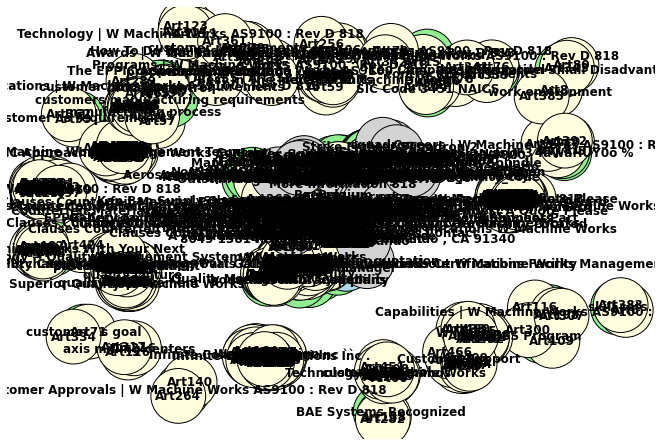

In [27]:
showGraph(G)

In [28]:
showArticle(G, 'Art0')

Art0 : Text Block used to Extract Entities from:
Art0 ['["Careers | W Machine Works AS9100 : Rev D 818.']
------------------------------
Art0 : All edges from this node are:
noID ('Careers | W Machine Works AS9100 : Rev D 818', 'Art0') none


In [516]:
showEntity(G, "Federal_Trade_Commission")

wikiID = Q786713 Federal_Trade_Commission
wikipedia url = https://en.wikipedia.org/wiki/Federal_Trade_Commission
description =  "United States federal government agency"
Federal_Trade_Commission  is an instance of  ['English']


+ ___Save the Knowledge Graph into a Pickle File___

In [748]:
nx.write_gpickle(G, r'C:\Users\akumar33\OneDrive - North Carolina State University\NCSU\CSC591 GDM\P-2\P3 files\dataprivacy2_updated')
# nx.read_gpickle('../kg/relativity_KG') # to load the graph back

In [31]:
nx.write_gpickle(G, r'C:\Users\Connie\Downloads\kg1017')
# nx.read_gpickle('../kg/relativity_KG') # to load the graph back

+ __Load Saved Knowledge Graph and Visualize It__

In [32]:
G_loaded = nx.read_gpickle(r'C:\Users\Connie\Downloads\kg1017')

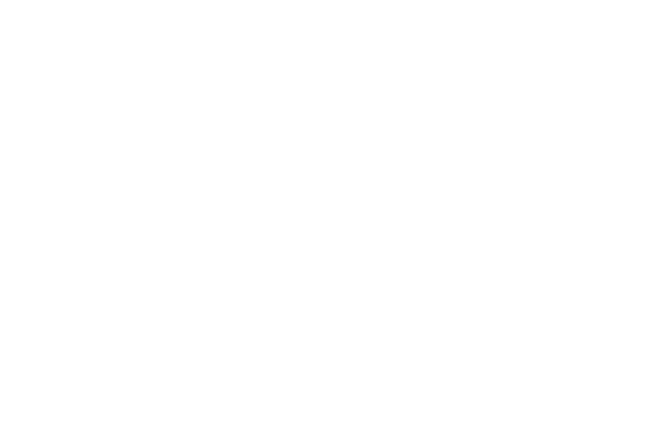

In [33]:
showGraph(G_loaded)
plt.show()

In [113]:
G = G_loaded

In [114]:
print(showEntity(G, "Event_horizon"))
print("-"*50)
print(showEntity(G, "hypersurface"))
print("-"*50)
print(showArticle(G, 'Art0'))
print("-"*50)
print(showArticle(G, 'Art1'))

wikiID = Q181741 Event_horizon
wikipedia url = https://en.wikipedia.org/wiki/Event_horizon
description =  "the point of no return; boundary of a region of spacetime from which one cannot escape once entered"
Event_horizon  is an instance of  ['hypersurface']
None
--------------------------------------------------
wikiID = Q973321 hypersurface
wikipedia url = notknown
description =  "generalization of the concepts of hyperplane, plane curve, and surface; a manifold or an algebraic variety of dimension n, which is embedded in an ambient space of dimension n+1"
None
--------------------------------------------------
Art0 : Text Block used to Extract Entities from:
Art0 ['The Theory of General Relativity demonstrates that Black Holes are hidden by an Event Horizon.', 'Soon after publishing the special theory of relativity in 1905, Einstein started thinking about how to incorporate gravity into his new relativistic framework.', 'There is nothing here.']
------------------------------
Art0 :

### Queries, Node Embeddings

#### Step-12: Perform Sentence Embedding for Queries using BERT Transformer

+ __Load pretrained BERT model for sentence embeddings__

In [29]:
# Load pretrained BERT model for sentence embeddings
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

+ __Load and Explore the Graph from the Saved Copy__

In [50]:
#nx.write_gpickle(G, '../kg/phy_plus_geo_singlesent_KG')
G = nx.read_gpickle(r'C:\Users\Connie\Downloads\dataprivacy2_updated')

In [51]:
showEntity(G, 'Electronic Communications Privacy Act')

wikiID = Q5358231 Electronic Communications Privacy Act
wikipedia url = notknown
description =  "US Act of Congress"


_Examine the API of the `networksx` module_

In [30]:
# Examine the API for networkx Graph
dir (G)[-43:]

['_node',
 'add_edge',
 'add_edges_from',
 'add_node',
 'add_nodes_from',
 'add_weighted_edges_from',
 'adj',
 'adjacency',
 'adjlist_inner_dict_factory',
 'adjlist_outer_dict_factory',
 'clear',
 'copy',
 'degree',
 'edge_attr_dict_factory',
 'edge_subgraph',
 'edges',
 'get_edge_data',
 'graph',
 'graph_attr_dict_factory',
 'has_edge',
 'has_node',
 'is_directed',
 'is_multigraph',
 'name',
 'nbunch_iter',
 'neighbors',
 'node_attr_dict_factory',
 'node_dict_factory',
 'nodes',
 'number_of_edges',
 'number_of_nodes',
 'order',
 'remove_edge',
 'remove_edges_from',
 'remove_node',
 'remove_nodes_from',
 'size',
 'subgraph',
 'to_directed',
 'to_directed_class',
 'to_undirected',
 'to_undirected_class',
 'update']

In [31]:
print("Nodes: ", G.number_of_nodes())
print("Links/Edges: ", G.number_of_edges())
print("Size: ", G.size())
print("Type (directed, multigraph): ", G.is_directed(), G.is_multigraph())

Nodes:  736
Links/Edges:  1728
Size:  1728
Type (directed, multigraph):  False False


In [32]:
nodes = G.nodes()
edges = G.edges()
print(type(nodes))
print(type(edges))
print("Nodes API:", dir (nodes)[-6:])
print("Edges API: ", dir(edges)[-7:])

<class 'networkx.classes.reportviews.NodeView'>
<class 'networkx.classes.reportviews.EdgeView'>
Nodes API: ['data', 'get', 'isdisjoint', 'items', 'keys', 'values']
Edges API:  ['data', 'dataview', 'get', 'isdisjoint', 'items', 'keys', 'values']


+ __Extract Data/Information from the Knowledge Graph__

In [33]:
def extract_info_from_KG (G):
    instances = []
    classes = []
    lines = []
    ent_cnt = 0 
    
    for nd in G.nodes:
        try:
            print("Node in KG: ", nd)
            print("Node Metadata: ", G.nodes[nd])
            node = G.nodes[nd]
            print("Node Flavor: ", node['flavor'])

            if node['flavor'] == 'entity':
                ent_cnt +=1
                inst = node['instanceof']
                instances = instances + inst
                clas = node['subclassof']
                classes = classes + clas
                print("Instance Of: ", inst)
                print("Subclass Of: ", clas)
            elif node['flavor'] == 'article':
                print('Context from ', nd, ": ", node['context'])
                print('Entity List: ', node['ent-list'])
                lines.append([node['context'], nd])
            print("-"*50)
        except KeyError:
            continue
    instanceSet = set(instances)
    instances = list(instanceSet)
    classSet = set(classes)
    classes = list(classSet)
    sentences = [lines[i][0] for i in range(len(lines))]
    keys = [lines[i][1] for i in range(len(lines))]
    
    return sentences, keys, instances, classes, ent_cnt

In [34]:
sentences, keys, instancaes, classes, ent_cnt = extract_info_from_KG (G)

Node in KG:  Careers | W Machine Works AS9100 : Rev D 818
Node Metadata:  {'flavor': 'entity', 'url': 'none', 'wikiID': 'noID', 'color': 'lightgreen', 'instanceof': [], 'subclassof': [], 'description': ''}
Node Flavor:  entity
Instance Of:  []
Subclass Of:  []
--------------------------------------------------
Node in KG:  Art0
Node Metadata:  {'flavor': 'article', 'source': 'C:\\Users\\Connie\\Downloads\\1.txt', 'context': ['["Careers | W Machine Works AS9100 : Rev D 818.'], 'color': 'lightyellow', 'ent-list': ['Careers | W Machine Works AS9100 : Rev D 818']}
Node Flavor:  article
Context from  Art0 :  ['["Careers | W Machine Works AS9100 : Rev D 818.']
Entity List:  ['Careers | W Machine Works AS9100 : Rev D 818']
--------------------------------------------------
Node in KG:  W Machine Works 818
Node Metadata:  {'flavor': 'entity', 'url': 'none', 'wikiID': 'noID', 'color': 'lightgreen', 'instanceof': [], 'subclassof': [], 'description': ''}
Node Flavor:  entity
Instance Of:  []
Subc

Node in KG:  Palletized Mills Mori Seiki NMV3000
Node Metadata:  {'flavor': 'entity', 'url': 'none', 'wikiID': 'noID', 'color': 'lightgreen', 'instanceof': [], 'subclassof': [], 'description': ''}
Node Flavor:  entity
Instance Of:  []
Subclass Of:  []
--------------------------------------------------
Node in KG:  Dia X
Node Metadata:  {'flavor': 'entity', 'url': 'none', 'wikiID': 'noID', 'color': 'lightgreen', 'instanceof': [], 'subclassof': [], 'description': ''}
Node Flavor:  entity
Instance Of:  []
Subclass Of:  []
--------------------------------------------------
Node in KG:  DCG 12 Pallets
Node Metadata:  {'flavor': 'entity', 'url': 'none', 'wikiID': 'noID', 'color': 'lightgreen', 'instanceof': [], 'subclassof': [], 'description': ''}
Node Flavor:  entity
Instance Of:  []
Subclass Of:  []
--------------------------------------------------
Node in KG:  Max Work Piece 22
Node Metadata:  {'flavor': 'entity', 'url': 'none', 'wikiID': 'noID', 'color': 'lightgreen', 'instanceof': [], 

Context from  Art315 :  ['8049 Careers Request A Quote Please ensure Javascript is enabled for purposes of website accessibility W Machine Works 818.']
Entity List:  ['W Machine Works 818', 'Careers Request A Quote Please', 'JavaScript']
--------------------------------------------------
Node in KG:  Art316
Node Metadata:  {'flavor': 'article', 'source': 'C:\\Users\\Connie\\Downloads\\1.txt', 'context': ['8049 Request An Appointment Home About About W Machine Works Management Team The EPPIC Approach Facility & Capabilities Our Facility Capabilities Equipment Part Gallery Approvals Customers Programs Awards Certifications Suppliers How To Do Business With Us Purchase Order Clauses Counterfeit Material Prevention News Contact Technology W Machine Works uses the most sophisticated equipment in the manufacturing industry .'], 'color': 'lightyellow', 'ent-list': ['Gallery Approvals Customers Programs Awards Certifications Suppliers', 'W Machine Works Management Team', 'EPPIC Approach Facili

Node in KG:  Textron
Node Metadata:  {'flavor': 'entity', 'url': 'notknown', 'wikiID': 'Q2140315', 'color': 'lightgray', 'description': '"American industrial conglomerate"', 'instanceof': [], 'subclassof': []}
Node Flavor:  entity
Instance Of:  []
Subclass Of:  []
--------------------------------------------------
Node in KG:  San Fernando
Node Metadata:  {'flavor': 'entity', 'url': 'notknown', 'wikiID': 'q846406', 'color': 'lightgray', 'description': '"city in California, USA"', 'instanceof': [], 'subclassof': []}
Node Flavor:  entity
Instance Of:  []
Subclass Of:  []
--------------------------------------------------
Node in KG:  business
Node Metadata:  {'flavor': 'entity', 'url': 'notknown', 'wikiID': 'Q4830453', 'color': 'lightgray', 'description': '"organization involved in commercial, industrial, or professional activity"', 'instanceof': [], 'subclassof': []}
Node Flavor:  entity
Instance Of:  []
Subclass Of:  []
--------------------------------------------------
Node in KG:  BA

In [35]:
# Note: this graph build at a single sentence level for each Art node's context
print(ent_cnt, ': entity count')
print(len(instances), ': instance count \t ex.: ', instances[0:2])
print(len(classes), ': classes count')
print(len(keys), ': keys count \t ex.: ', keys[0:3])
print(len(sentences), ': sentence count')

220 : entity count


NameError: name 'instances' is not defined

In [36]:
sentences = [item for sublist in sentences for item in sublist]

In [37]:
(sentences)

['["Careers | W Machine Works AS9100 : Rev D 818.',
 '8049 Careers Request A Quote Please ensure Javascript is enabled for purposes of website accessibility W Machine Works 818.',
 '8049 Request An Appointment Home About About W Machine Works Management Team The EPPIC Approach Facility & Capabilities Our Facility Capabilities Equipment Part Gallery Approvals Customers Programs Awards Certifications Suppliers How To Do Business With Us Purchase Order Clauses Counterfeit Material Prevention News Contact Careers / Online Application W Machine Works has come a long way in its four decades of aerospace machining .',
 "From 1500 square feet bays in an industrial park to today 's 27,000 square foot state of the art facility , W Machine Works continues to improve in all aspects of business .",
 'Employees , machinery and facilities all continue to be upgraded as W Machine Works is committed to continuous improvement .',
 'W Machine Works is looking for talented people who have a passion for ma

+ __Extract Sentence Embeddings from BERT Model__

In [38]:
# Use the BERT model to encode all the sentences 
# Matrix contains the sentence embedding vector 
# for the ith sentence normalized to unit length
def get_sentence_embeddings (sentence_list):
    sentence_embeddings = sbert_model.encode(sentences)
    matrix = np.zeros((len(sentences), 768))
    for i in range(len(sentences)):
        vec_norm = np.linalg.norm(sentence_embeddings[i]) # vector norm
        matrix[i] = sentence_embeddings[i]/vec_norm       # normalize to unit length  

    return matrix

In [39]:
# This will take a couple of minutes to compute
matrix = get_sentence_embeddings (sentences)

In [40]:
print(matrix.shape, ": No_sentences-by-No-dimensions Matrix of Sentence Embeddings")
print(np.round(matrix[0][0:5],3)) # the first 5 components of the vector for sentence[0] 

(516, 768) : No_sentences-by-No-dimensions Matrix of Sentence Embeddings
[ 0.028  0.048  0.078 -0.008  0.073]


__Step-13: Question Answering using BERT Embeddings__

_Query Process Description_:
+ To answer the question, or query, the sentences that are the closest can be used as the best fits.
+ First, the Query Question/Text should be encoded using the same BERT model
    - The query embedded vector should be normalized to unit length
+ The `dot-product` of the normalized vectors is used as the measure of proximity:
    - The higher the value of the dot product between the query vector and the sentence vector, the better the match
    - Sort dot product values and return the top-k sentences

In [43]:
def find_best (k, query, matrix, keys, G, show=True):
    v = sbert_model.encode([query])[0]
    v0 = v/np.linalg.norm(v) # normalize the query vector to unit length
    norms = []
    # compute proximity between query vector and sentence vector
    for i in range(matrix.shape[0]):
        norms.append([round(np.dot(v0, matrix[i]),4), i])
    norms.sort(reverse=True)
    
    if show:
        print('Top ', k, ' related nodes for Query: ', query, "\n" )

    for i in range(k):
        node = keys[norms[i][1]]
        if show:
            print("Matching Node: ", node)
            print("Query Answer Sentence: ", sentences[norms[i][1]])
            print("-"*20)
    return norms[0:k]

def display_results(top_k, query, norms, keys, sentences):
    print("*"*50)
    print (top_k, " Top Answers for Query: ", query)
    for i in range(top_k):
        node = keys[norms[i][1]]
        sent = sentences[norms[i][1]]
        print ("Matching Node: ", node)
        print ("Query Answer Sentence: ", sent)
        print ("Matching Score: ", norms[i][0])
        print("-"*30)    

In [44]:
norms


NameError: name 'norms' is not defined

In [45]:
query = "What certification do we have?"
top_k = 4

norms = find_best(top_k, query, matrix, keys, G, show = False)
display_results (top_k, query, norms, keys, sentences)

**************************************************
4  Top Answers for Query:  What certification do we have?
Matching Node:  Art15
Query Answer Sentence:  , 'Request A Quote | W Machine Works AS9100 : Rev D 818.
Matching Score:  0.5881
------------------------------
Matching Node:  Art307
Query Answer Sentence:  ', 'Capabilities | W Machine Works AS9100 : Rev D 818.
Matching Score:  0.5863
------------------------------
Matching Node:  Art198
Query Answer Sentence:  ', 'Capabilities | W Machine Works AS9100 : Rev D 818.
Matching Score:  0.5863
------------------------------
Matching Node:  Art116
Query Answer Sentence:  ', 'Capabilities | W Machine Works AS9100 : Rev D 818.
Matching Score:  0.5863
------------------------------


In [ ]:
#The query result is right
#Correct Answer is shown below:

#The Privacy Act of 1974 is a public sector law that regulates the use of personal information by the United States Government. Specifically it establishes rules, similar to the Fair Information Practice Principles that determine what information may be collected and how it may be used in order to protect the personal privacy of U.S. citizens.

_Summary Points_:
+ Given a small selection of documents, the answers are reasonably good. However, there are instances where it is not good.
> Important Note: We have _not_ used any properties of the graph structure in this query processing.

### Graph Convolutions for Improved Question Answering

__Step-14: Use the Structure of the Graph to Perform Graph Convolutions__
+ For each Article node x  in the graph, collect all its immediate neighbors:
    - _immediate neighbors_ are other Article nodes linked to an entity node shared with x.   
+ Compute a weighted sum (using a parameter lambda in [0,1]) of the BERT embedding vectors for each neighbor with the BERT embedding of for x.   
+ Normalize this new vector to get the new embedding matrix, `matrix_conv`. 

_Observations_:
> The new embedding captures more of the local properties of the graphs.

> There is no encoder for the Query Question/Text for this new model, unlike the one we had in Step-13.

In [46]:
# Compute sentence embeddings using the graph convolutional approach
# In original github it is function computeMar2()
def get_conv_sentence_embeddings (G, keys, matrix, lambd = 0.75):
    matrix_conv = np.zeros((matrix.shape[0], 768))
    num_zero_neighbors = 0
    tot_neighbors = 0
    num_arts = 0

    for art in G.nodes():
        if G.nodes[art]['flavor'] == 'article':
            num_arts += 1.0
            neighbors, features =  findNeighbors(G, art)
            v = np.zeros((768))
            c = 0.0
            if len(neighbors) == 0:
                num_zero_neighbors +=1
            tot_neighbors += len(neighbors)
            if len(neighbors) > 0:
                for x in neighbors:
                    loc = find_in_keys(x, keys)
                    v = v + matrix[loc]
                    c = c+1.0
                v = v/c
                z = lambd * matrix[find_in_keys(art, keys)] + (1.0-lambd) * v
                z = z/np.linalg.norm(z)
                matrix_conv[find_in_keys(art, keys)] = z
            else:
                matrix_conv[find_in_keys(art, keys)] = matrix_conv[find_in_keys(art, keys)]

    return matrix_conv, num_zero_neighbors, tot_neighbors/num_arts

# Exclude comparison of the node p with super nodes such as'Earth' or 'Albert_Einstein'
# These nodes make too many nodes neighbors.
def findNeighbors(G, art):
    n = G.nodes[art]
    #print(n)
    features = []
    neighbors = []
    for x in G.edges:
        if x[1] == art:
            #print('found art in ',x)
            p = x[0]
            features.append(p)
            if p != 'Albert_Einstein' and p != 'Earth':
                for y in G.edges:
                    if y[0] == p:
                        if y[1] != art:
                            #print(y[1][0:3])
                            if y[1][0:3] != 'Art':
                                features.append(y[1])
                            else:
                                neighbors.append(y[1])
    return neighbors, features

def find_in_keys(nodeid, keys):
    for i in range(len(keys)):
        if nodeid == keys[i]:
            return i
    return -1


In [47]:
# Total NN per Article node: tot_nn
# Article Nodes without NN: num_zero_nn
matrix_conv, num_zero_nn, tot_nn = get_conv_sentence_embeddings (G, keys, matrix, lambd = 0.8)

print(num_zero_nn, tot_nn)

1 99.81782945736434


__Create the Embedding for a Query using the Convolutional Model__
+ Ask the Google NER service to provide the named entities in the Query question.
+ Search for the Article node with the largest number of named entities that are also in our query
+ Use the `matrix_conv` to get the convolved vector for that Article node as a reasonable encoding for the Query.
+ If thereis no clear winner in the search, then use the Article that `find_best()` suggests as the best fit and use that Article's `matrix_conv` vector as our Query encoding.

In [48]:
# The function findClue() extracts entities from the sentence and 
# then looks for the closest match in all of the Article nodes 
# among those that have the same entities. 
# If there are more than 2 with the max number of matches, then just give up and return [].

def findClue(G, query_sent_list, show = True):
    cls = entityExtractorBlock(query_sent_list)
    clsent = [x[0] for x in cls]
    if show:
        print(clsent)
    arts = []
    for x in cls:
        item = x[0]
        for edg in G.edges():
            #print(edg)
            if edg[0] == item and G.nodes[edg[1]]['flavor'] == 'article':
                arts.append(edg[1])
    artset = set(arts)
    artnames = list(artset)
    factoredartnames = []
    for art in artnames:
        #context = G.nodes[art]['context']
        #print('context=',context)
        cls1ent = G.nodes[art]['ent-list']
        #cls1ent = [x[0] for x in cls1]
        cls1int = set(clsent).intersection(set(cls1ent))
        if cls1int != set():
            factoredartnames.append((art, len(cls1int)))
        artnames = [x[0] for x in factoredartnames]
    #if show:
    #    print('artnames=',artnames)
    dic = {}
    for x in artnames:
        dic[x] = 0
    for x in factoredartnames:
        dic[x[0]] = x[1]
    #print('DIC =',dic)
    bmax = 0
    bestmax = ''
    for x in artnames:
        if dic[x] > bmax:
            bmax = dic[x]
            #print(x)
            bestmax = x
    count_ties = 0
    tie_list = []
    for x in artnames:
        if dic[x] == bmax:
            count_ties += 1
            tie_list.append(x)

    print(count_ties, 'nodes out of',len(artnames), 'matched the max value of ', bmax)
    if count_ties >  0.5*len(artnames) and len(artnames)> 2:
        return  []
    return tie_list


+ To compute the convolutions, find all the neighbors of each node. 
+ Two nodes are neighbors if they share an entity node. 
+ Function `find_best_conv()` looks for clues. 
    - There are either 0, 1 or 2 clues. 
    - If there are 0 clues we use `find_best()` for `k=1` to give us a guess. 
    - If there are 1 or 2 clues, use them in `find_best_by_article_ID()` to complete the list.
    - In the case of 2 clues, use the first clue to generate the first two replies and the second clue to get the rest.

In [49]:
# find_best (k, query, matrix, keys, G, show=True)
# findClue(G, query_sent_list, show = True)
# find_best_by_article_ID(k, nodeid, matrix_conv, show=True)

def find_best_conv (k, query, matrix, matrix_conv, keys, G, show = True):
    query_sent_list = [query]
    cls = findClue(G, query_sent_list, show)
    #print('clues are =', cls)
    if cls != []:
        best = cls[0]
    else:
        top_k = 1
        x = find_best(top_k, query, matrix, keys, G, show=show)
        best = keys[x[0][1]]
    if (len(cls)> 1): # clues
        normsa = find_best_by_article_ID (2, cls[0], matrix_conv, keys, show)
        normsb = find_best_by_article_ID (k-2, cls[1], matrix_conv, keys, show)
        norms = normsa + normsb
    else: # one clue
        norms = find_best_by_article_ID(k, best, matrix_conv, keys, show)

    return norms


def find_best_by_article_ID (k, nodeid, matrix_conv, keys, show=True):
    #print(nodeid)
    v0 = matrix_conv[find_in_keys(nodeid, keys)]
    norms = []
    for i in range(matrix_conv.shape[0]):
        norms.append([round(np.dot(v0, matrix_conv[i]),4), i])
    norms.sort(reverse=True)

    return norms[0:k]    

In [50]:
matrix_conv.shape, matrix.shape

((516, 768), (516, 768))

In [53]:
query = "Who is our customer ?"
top_k = 4
norms = find_best_conv (top_k, query, matrix, matrix_conv, keys, G, show = False)
display_results (top_k, query, norms, keys, sentences)

0 nodes out of 0 matched the max value of  0
**************************************************
4  Top Answers for Query:  Who is our customer ?
Matching Node:  Art363
Query Answer Sentence:  Collaboration – Who do we need to reach out to or support to help us meet customer ’ s demand ?
Matching Score:  1.0
------------------------------
Matching Node:  Art100
Query Answer Sentence:  Collaboration – Who do we need to reach out to or support to help us meet customer ’ s demand ?
Matching Score:  1.0
------------------------------
Matching Node:  Art361
Query Answer Sentence:  People – Do we have the people and do they have the skillset to meet customer requirements ?
Matching Score:  0.8944
------------------------------
Matching Node:  Art98
Query Answer Sentence:  People – Do we have the people and do they have the skillset to meet customer requirements ?
Matching Score:  0.8944
------------------------------


In [ ]:
#The query result is right.
#The correct answer is shown below:
#The purpose of the Electronic Communications Privacy Act (ECPA) was to ban a third party from intercepting and/or disclosing electronic communications without prior authorization.

In [58]:
query = "What is our phone number?"
top_k = 4
norms = find_best_conv (top_k, query, matrix, matrix_conv, keys, G, show = False)
display_results (top_k, query, norms, keys, sentences)

0 nodes out of 0 matched the max value of  0
**************************************************
4  Top Answers for Query:  What is our phone number?
Matching Node:  Art342
Query Answer Sentence:  One phone call and the status of your job is known , of the typical customer service runaround will be found .
Matching Score:  1.0
------------------------------
Matching Node:  Art79
Query Answer Sentence:  One phone call and the status of your job is known , of the typical customer service runaround will be found .
Matching Score:  1.0
------------------------------
Matching Node:  Art17
Query Answer Sentence:  8049 Request An Appointment Home About About W Machine Works Management Team The EPPIC Approach Facility & Capabilities Our Facility Capabilities Equipment Part Gallery Approvals Customers Programs Awards Certifications Suppliers How To Do Business With Us Purchase Order Clauses Counterfeit Material Prevention News Contact Request A Quote Request A Quote Please complete the below and

In [ ]:
#The query result is correlated to the correct answer but it's not precise.
#The correct answer is shown below:
#Every organization subject to the Personal Information Protection and Electronic Documents Act (PIPEDA) is specifically required to designate an individual who is accountable for its compliance with the Act (often called a Privacy Officer), and to make the identity of the Privacy Officer known on request.

In [85]:
showEntity(G,'Electronic Communications Privacy Act')

wikiID = Q5358231 Electronic Communications Privacy Act
wikipedia url = notknown
description =  "US Act of Congress"


In [ ]:
#The enitiy info is right.

In [87]:
query = "Why was Fair Debt Collection Practices Act created?"
top_k = 4
norms = find_best_conv (top_k, query, matrix, matrix_conv, keys, G, show = False)
display_results (top_k, query, norms, keys, sentences)

13 nodes out of 13 matched the max value of  1
**************************************************
4  Top Answers for Query:  Why was Fair Debt Collection Practices Act created?
Matching Node:  Art168
Query Answer Sentence:  ['The Truth in Lending Act (TILA), 15 USC 1601 et seq.']
Matching Score:  1.0
------------------------------
Matching Node:  Art169
Query Answer Sentence:  [', was enacted on , as title I of the Consumer Credit Protection Act (Pub; L. 90-321); The TILA, implemented by Regulation Z (12 CFR 226), became effective .']
Matching Score:  0.8294
------------------------------
Matching Node:  Art121
Query Answer Sentence:  ['Section 1100F of the Dodd-Frank Act amended the FCRA to require disclosure of credit scores and information relating to credit scores for both risk-based pricing and FCRA adverse action notices.']
Matching Score:  0.7404
------------------------------
Matching Node:  Art112
Query Answer Sentence:  ['Title 12 of the Code of Federal Regulations - Wikipedi

In [ ]:
#The query result is not right.
#The correct answer is : The Fair Debt Collection Practices Act was created to encourage honest and fair dealings in debt collection, to provide consumers a means to dispute debt information. To explore this concept, consider the following Fair Debt Collection Practices Act definition. Definition of Fair Debt Collection Practices Act

In [775]:
query = "What does Personal Health Information Protection Act include?"
top_k = 4
norms = find_best_conv (top_k, query, matrix, matrix_conv, keys, G, show = False)
display_results (top_k, query, norms, keys, sentences)

6 nodes out of 6 matched the max value of  1
**************************************************
4  Top Answers for Query:  What does Personal Health Information Protection Act include?
Matching Node:  Art258
Query Answer Sentence:  PHIPA governs the manner in which personal health information may be collected, used and disclosed within the health sector.
Matching Score:  1.0
------------------------------
Matching Node:  Art239
Query Answer Sentence:  PHIPA governs the manner in which personal health information may be collected, used and disclosed within the health sector; It regulates health information custodians (custodians), as well as individuals and organizations that receive personal health information from custodians.
Matching Score:  0.9741
------------------------------
Matching Node:  Art243
Query Answer Sentence:  Under PHIPA, personal health information includes the following: Any “identifying information” about an individual, whether oral or recorded, if the information:

In [ ]:
#The query result is right.
#Correct answer: The Personal Health Information Protection Act is an in-depth piece of legislation designed to address very complex issues concerning the collection, use and disclosure of personal health information by health information custodians. Individuals are very concerned about how their personal health information is collected, used and disclosed.

In [88]:
query = "When was Fair and Accurate Credit Transactions Act created?"
top_k = 7
norms = find_best_conv (top_k, query, matrix, matrix_conv, keys, G, show = False)
display_results (top_k, query, norms, keys, sentences)

10 nodes out of 10 matched the max value of  1
**************************************************
7  Top Answers for Query:  When was Fair and Accurate Credit Transactions Act created?
Matching Node:  Art266
Query Answer Sentence:  ['The Fair Credit Reporting Act (FCRA) was enacted to promote accuracy, fairness, and the privacy of personal information assembled by credit reporting agencies.']
Matching Score:  1.0
------------------------------
Matching Node:  Art191
Query Answer Sentence:  ['The Fair Credit Reporting Act (FCRA) is a federal law that helps to ensure the accuracy, fairness and privacy of the information in consumer credit bureau files; The law regulates the way credit reporting agencies can collect, access, use and share the data they collect in your consumer reports.']
Matching Score:  0.9098
------------------------------
Matching Node:  Art219
Query Answer Sentence:  ['The Fair Credit Reporting Act of 1970 ensures that consumer reporting agencies use procedures which 

In [ ]:
#The query result is right.
#The correct answer: 1970

In [774]:
query = "Why was Fair Debt Collection Practices Act created?"
top_k = 4
norms = find_best(top_k, query, matrix, keys, G, show = False)
display_results (top_k, query, norms, keys, sentences)

**************************************************
4  Top Answers for Query:  Why was Fair Debt Collection Practices Act created?
Matching Node:  Art168
Query Answer Sentence:  The Truth in Lending Act (TILA), 15 USC 1601 et seq.
Matching Score:  0.7066
------------------------------
Matching Node:  Art266
Query Answer Sentence:  The Fair Credit Reporting Act (FCRA) was enacted to promote accuracy, fairness, and the privacy of personal information assembled by credit reporting agencies.
Matching Score:  0.7021
------------------------------
Matching Node:  Art200
Query Answer Sentence:  The Fair Debt Collection Practices Act (FDCPA) is a federal law that governs how debt collectors (including a bank that collects its own debt under another business name) operate and prohibits debt collectors from using unfair or deceptive practices to collect debts; Your state laws may offer additional protections.
Matching Score:  0.6873
------------------------------
Matching Node:  Art22
Query Answe

In [ ]:
#The query result is not right.
#The correct answer is : The Fair Debt Collection Practices Act was created to encourage honest and fair dealings in debt collection, to provide consumers a means to dispute debt information. To explore this concept, consider the following Fair Debt Collection Practices Act definition.

In [779]:
query = "When was Fair and Accurate Credit Transactions Act implemented?"
top_k = 8
norms = find_best(top_k, query, matrix, keys, G, show = False)
display_results (top_k, query, norms, keys, sentences)

**************************************************
8  Top Answers for Query:  When was Fair and Accurate Credit Transactions Act implemented?
Matching Node:  Art266
Query Answer Sentence:  The Fair Credit Reporting Act (FCRA) was enacted to promote accuracy, fairness, and the privacy of personal information assembled by credit reporting agencies.
Matching Score:  0.7607
------------------------------
Matching Node:  Art67
Query Answer Sentence:  The Truth in Lending Act (TILA) is intended to ensure that credit terms are disclosed in a meaningful way so consumers can compare credit terms more readily and knowledgeably; .
Matching Score:  0.7542
------------------------------
Matching Node:  Art209
Query Answer Sentence:  The Fair Credit Reporting Act Of 1971 was created to require consumer reporting agencies to adopt reasonable procedures to meet the needs of commerce for consumer credit personnel, insurance, and other information in a manner which is fair and equitable to the consumer.

In [ ]:
#The query result is right.
#The correct answer: 197

In [787]:
x = nx.degree_centrality(G)
t = dict(sorted(x.items(), key=lambda item: item[1]))

    

In [795]:
G.edges('Fair_Credit_Reporting_Act')

EdgeDataView([('Fair_Credit_Reporting_Act', 'Art0'), ('Fair_Credit_Reporting_Act', 'Art1'), ('Fair_Credit_Reporting_Act', 'Art6'), ('Fair_Credit_Reporting_Act', 'Art18'), ('Fair_Credit_Reporting_Act', 'Art78'), ('Fair_Credit_Reporting_Act', 'Art86'), ('Fair_Credit_Reporting_Act', 'Art89'), ('Fair_Credit_Reporting_Act', 'Art95'), ('Fair_Credit_Reporting_Act', 'Art108'), ('Fair_Credit_Reporting_Act', 'Art121'), ('Fair_Credit_Reporting_Act', 'Art163'), ('Fair_Credit_Reporting_Act', 'Art167'), ('Fair_Credit_Reporting_Act', 'Art171'), ('Fair_Credit_Reporting_Act', 'Art185'), ('Fair_Credit_Reporting_Act', 'Art191'), ('Fair_Credit_Reporting_Act', 'Art207'), ('Fair_Credit_Reporting_Act', 'Art219'), ('Fair_Credit_Reporting_Act', 'Art232'), ('Fair_Credit_Reporting_Act', 'Art244'), ('Fair_Credit_Reporting_Act', 'Art266'), ('Fair_Credit_Reporting_Act', 'United States of America')])

In [792]:
showEntity(G,'Fair_Credit_Reporting_Act')

wikiID = Q5429774 Fair_Credit_Reporting_Act
wikipedia url = https://en.wikipedia.org/wiki/Fair_Credit_Reporting_Act
description =  "U.S. federal legislation regulating use of private information by credit rating agencies"
Fair_Credit_Reporting_Act  is an instance of  ['United States of America']


In [788]:
t

{'The Federal Trade CommissionWhen': 0.0013422818791946308,
 'credit extensions': 0.0013422818791946308,
 'fraud alert': 0.0013422818791946308,
 'HIPAA Survival Guide': 0.0013422818791946308,
 'Health information': 0.0013422818791946308,
 'treatment information': 0.0013422818791946308,
 'prescription information': 0.0013422818791946308,
 'identification numbers': 0.0013422818791946308,
 'emergency contact': 0.0013422818791946308,
 'birth dates': 0.0013422818791946308,
 'patient health information': 0.0013422818791946308,
 'Public Law 104-191': 0.0013422818791946308,
 'HR department': 0.0013422818791946308,
 'March 1978': 0.0013422818791946308,
 'government authorities': 0.0013422818791946308,
 'child abuse': 0.0013422818791946308,
 'network service providers': 0.0013422818791946308,
 'privacy protection': 0.0013422818791946308,
 'account information': 0.0013422818791946308,
 'Art10': 0.0013422818791946308,
 'Office of the Privacy Commissioner of Canada': 0.0013422818791946308,
 'Title 

In [89]:
query = "Who is Electronic Communications Privacy Act required to?"
top_k = 4
norms = find_best_conv (top_k, query, matrix, matrix_conv, keys, G, show = False)
display_results (top_k, query, norms, keys, sentences)

13 nodes out of 13 matched the max value of  1
**************************************************
4  Top Answers for Query:  Who is Electronic Communications Privacy Act required to?
Matching Node:  Art72
Query Answer Sentence:  ['Once the email is stored on a computer (email server/user computer), it is protected from unauthorized access under the Stored Communications Act (Title II of Electronic Communications Privacy Act); .']
Matching Score:  1.0
------------------------------
Matching Node:  Art9
Query Answer Sentence:  ['The Stored Communications Act (SCA), enacted in 1986, provides statutory privacy protection for customers of network service providers; The SCA controls how the government can access stored account information from entities such as Internet Service Providers (ISPs).']
Matching Score:  0.9028
------------------------------
Matching Node:  Art64
Query Answer Sentence:  ['The ECPA, as amended, protects wire, oral, and electronic communications while those communicat

In [ ]:
#The query result is correlated to the correct answer but it's not precise.
#The correct answer is shown below:
#Every organization subject to the Personal Information Protection and Electronic Documents Act (PIPEDA) is specifically required to designate an individual who is accountable for its compliance with the Act (often called a Privacy Officer), and to make the identity of the Privacy Officer known on request.

In [98]:
query = "What is The Health Insurance Portability and Accountability Act ?"
top_k = 8
norms = find_best(top_k, query, matrix, keys, G, show = False)
display_results (top_k, query, norms, keys, sentences)

**************************************************
8  Top Answers for Query:  What is The Health Insurance Portability and Accountability Act ?
Matching Node:  Art4
Query Answer Sentence:  ['Health information such as diagnoses, treatment information, medical test results, and prescription information are considered protected health information under HIPAA, as are national identification numbers and demographic information such as birth dates, gender, ethnicity, and contact and emergency contact .']
Matching Score:  0.7634
------------------------------
Matching Node:  Art236
Query Answer Sentence:  ['Answer: The HIPAA Privacy and Security Rules are enforced by the Office for Civil Rights (OCR); View more information about complaints related to concerns about protected health information.']
Matching Score:  0.7478
------------------------------
Matching Node:  Art258
Query Answer Sentence:  ['PHIPA governs the manner in which personal health information may be collected, used and discl

In [ ]:
#The query result is right..
#Correct answer:HIPAA is a federal law that introduced standards in healthcare relating to patient privacy and the protection of medical data; HIPAA covers healthcare providers, health plans, healthcare clearinghouses, and business associates of HIPAA-covered entities

In [99]:
query = "What is The Health Insurance Portability and Accountability Act ?"
top_k = 4
norms = find_best_conv (top_k, query, matrix, matrix_conv, keys, G, show = False)
display_results (top_k, query, norms, keys, sentences)

12 nodes out of 12 matched the max value of  1
**************************************************
4  Top Answers for Query:  What is The Health Insurance Portability and Accountability Act ?
Matching Node:  Art4
Query Answer Sentence:  ['Health information such as diagnoses, treatment information, medical test results, and prescription information are considered protected health information under HIPAA, as are national identification numbers and demographic information such as birth dates, gender, ethnicity, and contact and emergency contact .']
Matching Score:  1.0
------------------------------
Matching Node:  Art213
Query Answer Sentence:  ["The HIPAA Privacy Rule establishes national standards to protect individuals' medical records and other personal health information and applies to health plans, health care clearinghouses, and those health care providers that conduct certain health care transactions electronically."]
Matching Score:  0.9188
------------------------------
Matchin

In [ ]:
#The query result is right..
#Correct answer:HIPAA is a federal law that introduced standards in healthcare relating to patient privacy and the protection of medical data; HIPAA covers healthcare providers, health plans, healthcare clearinghouses, and business associates of HIPAA-covered entities



In [101]:
query = "What is the fuction of The Health Insurance Portability and Accountability Act?"
top_k = 4
norms = find_best(top_k, query, matrix, keys, G, show = False)
display_results (top_k, query, norms, keys, sentences)

**************************************************
4  Top Answers for Query:  What is the fuction of The Health Insurance Portability and Accountability Act?
Matching Node:  Art236
Query Answer Sentence:  ['Answer: The HIPAA Privacy and Security Rules are enforced by the Office for Civil Rights (OCR); View more information about complaints related to concerns about protected health information.']
Matching Score:  0.7515
------------------------------
Matching Node:  Art4
Query Answer Sentence:  ['Health information such as diagnoses, treatment information, medical test results, and prescription information are considered protected health information under HIPAA, as are national identification numbers and demographic information such as birth dates, gender, ethnicity, and contact and emergency contact .']
Matching Score:  0.7473
------------------------------
Matching Node:  Art246
Query Answer Sentence:  ['HIPAA is a federal law that introduced standards in healthcare relating to patie

In [ ]:
#The query result is right..
#Correct answer:The Health Insurance Portability and Accountability Act of 1996 (HIPAA) is a federal law that required the creation of national standards to protect sensitive patient health information from being disclosed without the patient's consent or knowledge.


In [103]:
query = "What is the fuction of The Health Insurance Portability and Accountability Act?"
top_k = 4
norms = find_best_conv (top_k, query, matrix, matrix_conv, keys, G, show = False)
display_results (top_k, query, norms, keys, sentences)

0 nodes out of 0 matched the max value of  0
**************************************************
4  Top Answers for Query:  What is the fuction of The Health Insurance Portability and Accountability Act?
Matching Node:  Art236
Query Answer Sentence:  ['Answer: The HIPAA Privacy and Security Rules are enforced by the Office for Civil Rights (OCR); View more information about complaints related to concerns about protected health information.']
Matching Score:  1.0
------------------------------
Matching Node:  Art213
Query Answer Sentence:  ["The HIPAA Privacy Rule establishes national standards to protect individuals' medical records and other personal health information and applies to health plans, health care clearinghouses, and those health care providers that conduct certain health care transactions electronically."]
Matching Score:  0.905
------------------------------
Matching Node:  Art4
Query Answer Sentence:  ['Health information such as diagnoses, treatment information, medical

In [104]:
#The query result is right..
#Correct answer:The Health Insurance Portability and Accountability Act of 1996 (HIPAA) is a federal law that required the creation of national standards to protect sensitive patient health information from being disclosed without the patient's consent or knowledge.


In [105]:
query = "What does The Health Insurance Portability and Accountability Act protect?"
top_k = 4
norms = find_best(top_k, query, matrix, keys, G, show = False)
display_results (top_k, query, norms, keys, sentences)

**************************************************
4  Top Answers for Query:  What does The Health Insurance Portability and Accountability Act protect?
Matching Node:  Art236
Query Answer Sentence:  ['Answer: The HIPAA Privacy and Security Rules are enforced by the Office for Civil Rights (OCR); View more information about complaints related to concerns about protected health information.']
Matching Score:  0.8018
------------------------------
Matching Node:  Art4
Query Answer Sentence:  ['Health information such as diagnoses, treatment information, medical test results, and prescription information are considered protected health information under HIPAA, as are national identification numbers and demographic information such as birth dates, gender, ethnicity, and contact and emergency contact .']
Matching Score:  0.7861
------------------------------
Matching Node:  Art3
Query Answer Sentence:  ['402, as highlighted in the HIPAA Survival Guide, as: “The acquisition, access, use, or 

In [ ]:
#The query result is right.
#Correct answer: Health information such as diagnoses, treatment information, medical test results, and prescription information are considered protected health information under HIPAA, as are national identification numbers and demographic information such as birth dates, gender, ethnicity, and contact and emergency contact .'

In [106]:
query = "What does The Health Insurance Portability and Accountability Act protect?"
top_k = 4
norms = find_best_conv (top_k, query, matrix, matrix_conv, keys, G, show = False)
display_results (top_k, query, norms, keys, sentences)

12 nodes out of 12 matched the max value of  1
**************************************************
4  Top Answers for Query:  What does The Health Insurance Portability and Accountability Act protect?
Matching Node:  Art236
Query Answer Sentence:  ['Answer: The HIPAA Privacy and Security Rules are enforced by the Office for Civil Rights (OCR); View more information about complaints related to concerns about protected health information.']
Matching Score:  1.0
------------------------------
Matching Node:  Art213
Query Answer Sentence:  ["The HIPAA Privacy Rule establishes national standards to protect individuals' medical records and other personal health information and applies to health plans, health care clearinghouses, and those health care providers that conduct certain health care transactions electronically."]
Matching Score:  0.905
------------------------------
Matching Node:  Art4
Query Answer Sentence:  ['Health information such as diagnoses, treatment information, medical te

In [ ]:
#The query result is right.
#Correct answer: Health information such as diagnoses, treatment information, medical test results, and prescription information are considered protected health information under HIPAA, as are national identification numbers and demographic information such as birth dates, gender, ethnicity, and contact and emergency contact .'

In [107]:
query = "What is The Children's Online Privacy Protection Act? "
top_k = 4
norms = find_best(top_k, query, matrix, keys, G, show = False)
display_results (top_k, query, norms, keys, sentences)

**************************************************
4  Top Answers for Query:  What is The Children's Online Privacy Protection Act? 
Matching Node:  Art40
Query Answer Sentence:  ["The Children's Online Privacy Protection Act (COPPA) is a law created to protect the privacy of children under 13; ."]
Matching Score:  0.8161
------------------------------
Matching Node:  Art196
Query Answer Sentence:  ["Congress enacted the Children's Online Privacy Protection Act (COPPA) in 1998; ."]
Matching Score:  0.7462
------------------------------
Matching Node:  Art192
Query Answer Sentence:  ['- Step 1: Determine if Your Company is a Website or Online Service that Collects Personal Information from Kids Under 13; .']
Matching Score:  0.7271
------------------------------
Matching Node:  Art107
Query Answer Sentence:  ['The amended Rule took effect on ; The primary goal of COPPA is to place parents in control over what information is collected from their young children online; The Rule was design

In [ ]:
#The query result is right.
#Correct answer:The Children's Online Privacy Protection Act (COPPA) is a law created to protect the privacy of children under 13

In [108]:
query = "What is The Children's Online Privacy Protection Act?  "
top_k = 4
norms = find_best_conv (top_k, query, matrix, matrix_conv, keys, G, show = False)
display_results (top_k, query, norms, keys, sentences)

6 nodes out of 6 matched the max value of  1
**************************************************
4  Top Answers for Query:  What is The Children's Online Privacy Protection Act?  
Matching Node:  Art40
Query Answer Sentence:  ["The Children's Online Privacy Protection Act (COPPA) is a law created to protect the privacy of children under 13; ."]
Matching Score:  1.0
------------------------------
Matching Node:  Art80
Query Answer Sentence:  ['The Children\'s Online Privacy Protection Act ("COPPA") specifically protects the privacy of children under the age of 13 by requesting parental consent for the collection or use of any personal information of the users; The Act took effect in April 2000.']
Matching Score:  0.9118
------------------------------
Matching Node:  Art107
Query Answer Sentence:  ['The amended Rule took effect on ; The primary goal of COPPA is to place parents in control over what information is collected from their young children online; The Rule was designed to protect

In [ ]:
#The query result is right.
#Correct answer:The Children's Online Privacy Protection Act (COPPA) is a law created to protect the privacy of children under 13

In [110]:
query = "Who does The Children's Online Privacy Protection Act protect?"
top_k = 4
norms = find_best(top_k, query, matrix, keys, G, show = False)
display_results (top_k, query, norms, keys, sentences)

**************************************************
4  Top Answers for Query:  Who des The Children's Online Privacy Protection Act protect?
Matching Node:  Art40
Query Answer Sentence:  ["The Children's Online Privacy Protection Act (COPPA) is a law created to protect the privacy of children under 13; ."]
Matching Score:  0.812
------------------------------
Matching Node:  Art197
Query Answer Sentence:  ['; The primary goal of COPPA is to place parents in control over what information is collected from their young children online; The Rule was designed to protect children under age 13, while accounting for the dynamic nature of the Internet.']
Matching Score:  0.7419
------------------------------
Matching Node:  Art107
Query Answer Sentence:  ['The amended Rule took effect on ; The primary goal of COPPA is to place parents in control over what information is collected from their young children online; The Rule was designed to protect children under age 13, while accounting for the dy

In [ ]:
#The query result is right.
#Correct answer:The Children's Online Privacy Protection Act (COPPA) is a law created to protect the privacy of children under 13

In [111]:
query = "Who does The Children's Online Privacy Protection Act protect?"
top_k = 4
norms = find_best_conv (top_k, query, matrix, matrix_conv, keys, G, show = False)
display_results (top_k, query, norms, keys, sentences)

6 nodes out of 6 matched the max value of  1
**************************************************
4  Top Answers for Query:  Who does The Children's Online Privacy Protection Act protect?
Matching Node:  Art40
Query Answer Sentence:  ["The Children's Online Privacy Protection Act (COPPA) is a law created to protect the privacy of children under 13; ."]
Matching Score:  1.0
------------------------------
Matching Node:  Art80
Query Answer Sentence:  ['The Children\'s Online Privacy Protection Act ("COPPA") specifically protects the privacy of children under the age of 13 by requesting parental consent for the collection or use of any personal information of the users; The Act took effect in April 2000.']
Matching Score:  0.9118
------------------------------
Matching Node:  Art107
Query Answer Sentence:  ['The amended Rule took effect on ; The primary goal of COPPA is to place parents in control over what information is collected from their young children online; The Rule was designed to 

In [ ]:
#The query result is right.
#Correct answer:The Children's Online Privacy Protection Act (COPPA) is a law created to protect the privacy of children under 13

In [117]:
query = "What's the primary goal of The Children's Online Privacy Protection Act(COPPA)?"
top_k = 8
norms = find_best(top_k, query, matrix, keys, G, show = False)
display_results (top_k, query, norms, keys, sentences)

**************************************************
8  Top Answers for Query:  What's the primary goal of The Children's Online Privacy Protection Act(COPPA)?
Matching Node:  Art40
Query Answer Sentence:  ["The Children's Online Privacy Protection Act (COPPA) is a law created to protect the privacy of children under 13; ."]
Matching Score:  0.807
------------------------------
Matching Node:  Art96
Query Answer Sentence:  ['The Family Educational Rights and Privacy Act (FERPA) is a Federal law that protects the privacy of student education records; .']
Matching Score:  0.7742
------------------------------
Matching Node:  Art113
Query Answer Sentence:  ['The Family Educational Rights and Privacy ActThe Family Educational Rights and Privacy Act (FERPA) (20 U.S.C; § 1232g; 34 CFR Part 99) is a Federal law that protects the privacy of student education records; .']
Matching Score:  0.7726
------------------------------
Matching Node:  Art196
Query Answer Sentence:  ["Congress enacted the C

In [ ]:
#The query results contain the right answer.
#correct answer:The primary goal of COPPA is to place parents in control over what information is collected from their young children online; The Rule was designed to protect children under age 13, while accounting for the dynamic nature of the Internet.'

In [119]:
query = "When is The Children's Online Privacy Protection Act(COPPA) enacted ?"
top_k = 8
norms = find_best_conv (top_k, query, matrix, matrix_conv, keys, G, show = False)
display_results (top_k, query, norms, keys, sentences)

6 nodes out of 6 matched the max value of  1
**************************************************
8  Top Answers for Query:  When is The Children's Online Privacy Protection Act(COPPA) enacted ?
Matching Node:  Art40
Query Answer Sentence:  ["The Children's Online Privacy Protection Act (COPPA) is a law created to protect the privacy of children under 13; ."]
Matching Score:  1.0
------------------------------
Matching Node:  Art80
Query Answer Sentence:  ['The Children\'s Online Privacy Protection Act ("COPPA") specifically protects the privacy of children under the age of 13 by requesting parental consent for the collection or use of any personal information of the users; The Act took effect in April 2000.']
Matching Score:  0.9118
------------------------------
Matching Node:  Art107
Query Answer Sentence:  ['The amended Rule took effect on ; The primary goal of COPPA is to place parents in control over what information is collected from their young children online; The Rule was desig

In [ ]:
#The query results contain the right answer.
#Correct answer:1998

In [120]:
query = "When is The Children's Online Privacy Protection Act(COPPA) enacted ?"
top_k = 4
norms = find_best(top_k, query, matrix, keys, G, show = False)
display_results (top_k, query, norms, keys, sentences)

**************************************************
4  Top Answers for Query:  When is The Children's Online Privacy Protection Act(COPPA) enacted ?
Matching Node:  Art40
Query Answer Sentence:  ["The Children's Online Privacy Protection Act (COPPA) is a law created to protect the privacy of children under 13; ."]
Matching Score:  0.8238
------------------------------
Matching Node:  Art196
Query Answer Sentence:  ["Congress enacted the Children's Online Privacy Protection Act (COPPA) in 1998; ."]
Matching Score:  0.7811
------------------------------
Matching Node:  Art80
Query Answer Sentence:  ['The Children\'s Online Privacy Protection Act ("COPPA") specifically protects the privacy of children under the age of 13 by requesting parental consent for the collection or use of any personal information of the users; The Act took effect in April 2000.']
Matching Score:  0.736
------------------------------
Matching Node:  Art192
Query Answer Sentence:  ['- Step 1: Determine if Your Compan

In [ ]:
#The query results contain the right answer.
#Correct answer:1998

In [125]:
query = "What is The Family Educational Rights and Privacy Act (FERPA) ? "
top_k = 8
norms = find_best_conv (top_k, query, matrix, matrix_conv, keys, G, show = False)
display_results (top_k, query, norms, keys, sentences)

16 nodes out of 16 matched the max value of  1
**************************************************
8  Top Answers for Query:  What is The Family Educational Rights and Privacy Act (FERPA) ? 
Matching Node:  Art96
Query Answer Sentence:  ['The Family Educational Rights and Privacy Act (FERPA) is a Federal law that protects the privacy of student education records; .']
Matching Score:  1.0
------------------------------
Matching Node:  Art113
Query Answer Sentence:  ['The Family Educational Rights and Privacy ActThe Family Educational Rights and Privacy Act (FERPA) (20 U.S.C; § 1232g; 34 CFR Part 99) is a Federal law that protects the privacy of student education records; .']
Matching Score:  0.9835
------------------------------
Matching Node:  Art227
Query Answer Sentence:  ["The Family Educational Rights and Privacy Act (FERPA) is a federal law that affords parents the right to have access to their children's education records, the right to seek to have the records amended, and the rig

In [ ]:
#The query result is right.
#correct answer:The Family Educational Rights and Privacy Act (FERPA) is a Federal law that protects the privacy of student education records.

In [126]:
query = "What is The Family Educational Rights and Privacy Act (FERPA) ? "
top_k = 4
norms = find_best(top_k, query, matrix, keys, G, show = False)
display_results (top_k, query, norms, keys, sentences)

**************************************************
4  Top Answers for Query:  What is The Family Educational Rights and Privacy Act (FERPA) ? 
Matching Node:  Art96
Query Answer Sentence:  ['The Family Educational Rights and Privacy Act (FERPA) is a Federal law that protects the privacy of student education records; .']
Matching Score:  0.8348
------------------------------
Matching Node:  Art113
Query Answer Sentence:  ['The Family Educational Rights and Privacy ActThe Family Educational Rights and Privacy Act (FERPA) (20 U.S.C; § 1232g; 34 CFR Part 99) is a Federal law that protects the privacy of student education records; .']
Matching Score:  0.8149
------------------------------
Matching Node:  Art227
Query Answer Sentence:  ["The Family Educational Rights and Privacy Act (FERPA) is a federal law that affords parents the right to have access to their children's education records, the right to seek to have the records amended, and the right to have some control over the disclosure 

In [ ]:
#The query result is right.
#correct answer:The Family Educational Rights and Privacy Act (FERPA) is a Federal law that protects the privacy of student education records.

In [136]:
query = "The Family Educational Rights and Privacy Act"
top_k = 4
norms = find_best_conv (top_k, query, matrix, matrix_conv, keys, G, show = False)
display_results (top_k, query, norms, keys, sentences)

16 nodes out of 16 matched the max value of  1
**************************************************
4  Top Answers for Query:  The Family Educational Rights and Privacy Act
Matching Node:  Art96
Query Answer Sentence:  ['The Family Educational Rights and Privacy Act (FERPA) is a Federal law that protects the privacy of student education records; .']
Matching Score:  1.0
------------------------------
Matching Node:  Art113
Query Answer Sentence:  ['The Family Educational Rights and Privacy ActThe Family Educational Rights and Privacy Act (FERPA) (20 U.S.C; § 1232g; 34 CFR Part 99) is a Federal law that protects the privacy of student education records; .']
Matching Score:  0.9835
------------------------------
Matching Node:  Art227
Query Answer Sentence:  ["The Family Educational Rights and Privacy Act (FERPA) is a federal law that affords parents the right to have access to their children's education records, the right to seek to have the records amended, and the right to have some con

In [ ]:
#The query result is right.
#correct answer:The Family Educational Rights and Privacy Act (FERPA) is a Federal law that protects the privacy of student education records.

In [129]:
# The first two responses are excellent.
query = "What does The Family Educational Rights and Privacy Act protect?"
top_k = 4
norms = find_best_conv (top_k, query, matrix, matrix_conv, keys, G, show = False)
display_results (top_k, query, norms, keys, sentences)

0 nodes out of 0 matched the max value of  0
**************************************************
4  Top Answers for Query:  What does The Family Educational Rights and Privacy Act protect?
Matching Node:  Art96
Query Answer Sentence:  ['The Family Educational Rights and Privacy Act (FERPA) is a Federal law that protects the privacy of student education records; .']
Matching Score:  1.0
------------------------------
Matching Node:  Art113
Query Answer Sentence:  ['The Family Educational Rights and Privacy ActThe Family Educational Rights and Privacy Act (FERPA) (20 U.S.C; § 1232g; 34 CFR Part 99) is a Federal law that protects the privacy of student education records; .']
Matching Score:  0.9835
------------------------------
Matching Node:  Art227
Query Answer Sentence:  ["The Family Educational Rights and Privacy Act (FERPA) is a federal law that affords parents the right to have access to their children's education records, the right to seek to have the records amended, and the right

In [ ]:
#The query result is right.
#correct answer:The Family Educational Rights and Privacy Act (FERPA) is a Federal law that protects the privacy of student education records.

In [130]:
query = "What does The Family Educational Rights and Privacy Act protect?"
top_k = 5
norms = find_best_conv (top_k, query, matrix, matrix_conv, keys, G, show = False)
display_results (top_k, query, norms, keys, sentences)

0 nodes out of 0 matched the max value of  0
**************************************************
5  Top Answers for Query:  What does The Family Educational Rights and Privacy Act protect?
Matching Node:  Art96
Query Answer Sentence:  ['The Family Educational Rights and Privacy Act (FERPA) is a Federal law that protects the privacy of student education records; .']
Matching Score:  1.0
------------------------------
Matching Node:  Art113
Query Answer Sentence:  ['The Family Educational Rights and Privacy ActThe Family Educational Rights and Privacy Act (FERPA) (20 U.S.C; § 1232g; 34 CFR Part 99) is a Federal law that protects the privacy of student education records; .']
Matching Score:  0.9835
------------------------------
Matching Node:  Art227
Query Answer Sentence:  ["The Family Educational Rights and Privacy Act (FERPA) is a federal law that affords parents the right to have access to their children's education records, the right to seek to have the records amended, and the right

In [ ]:
#The query result is right.
#correct answer:The Family Educational Rights and Privacy Act (FERPA) is a Federal law that protects the privacy of student education records

In [133]:
query = "When was The Family Educational Rights and Privacy Act enacted?"
top_k = 8
norms = find_best(top_k, query, matrix, keys, G, show = False)
display_results (top_k, query, norms, keys, sentences)

**************************************************
8  Top Answers for Query:  When was The Family Educational Rights and Privacy Act enacted?
Matching Node:  Art227
Query Answer Sentence:  ["The Family Educational Rights and Privacy Act (FERPA) is a federal law that affords parents the right to have access to their children's education records, the right to seek to have the records amended, and the right to have some control over the disclosure of personally identifiable information from the education ."]
Matching Score:  0.7771
------------------------------
Matching Node:  Art96
Query Answer Sentence:  ['The Family Educational Rights and Privacy Act (FERPA) is a Federal law that protects the privacy of student education records; .']
Matching Score:  0.7766
------------------------------
Matching Node:  Art113
Query Answer Sentence:  ['The Family Educational Rights and Privacy ActThe Family Educational Rights and Privacy Act (FERPA) (20 U.S.C; § 1232g; 34 CFR Part 99) is a Federal law

In [ ]:
#The query results contain the right answer.
#correct answer:1974

In [134]:
query = "When was The Family Educational Rights and Privacy Act enacted?"
top_k = 4
norms = find_best_conv (top_k, query, matrix, matrix_conv, keys, G, show = False)
display_results (top_k, query, norms, keys, sentences)

0 nodes out of 0 matched the max value of  0
**************************************************
4  Top Answers for Query:  When was The Family Educational Rights and Privacy Act enacted?
Matching Node:  Art227
Query Answer Sentence:  ["The Family Educational Rights and Privacy Act (FERPA) is a federal law that affords parents the right to have access to their children's education records, the right to seek to have the records amended, and the right to have some control over the disclosure of personally identifiable information from the education ."]
Matching Score:  1.0
------------------------------
Matching Node:  Art96
Query Answer Sentence:  ['The Family Educational Rights and Privacy Act (FERPA) is a Federal law that protects the privacy of student education records; .']
Matching Score:  0.9469
------------------------------
Matching Node:  Art113
Query Answer Sentence:  ['The Family Educational Rights and Privacy ActThe Family Educational Rights and Privacy Act (FERPA) (20 U.S.C;

In [ ]:
#The query results contain the right answer.
#correct answer:1974

_Observations_:
+ Both `find_best()` and `find_best_conv)` fail on addressing the issue of "Who"
+ The convolutional version `find_best_conv()` addressed "solve" "field"equations" better than `find_best().`

__Part-5: SUBMIT INSTRUCTIONS__

_Sub-Part-A_:
+ In Part-5, you were provided with the ___subset of the functions=ality___ based on the following resources:
    + Paper: [Building a Tiny Knowledge Graph with BERT and Graph Convolutions](https://cloud4scieng.org/2020/10/27/building-a-tiny-knowledge-graph-with-bert-and-graph-convolutions/)
    + The Code from the [git repo](https://github.com/dbgannon/knowledge-graph), as you will be referencing some parts of the code
    + The provided codes slightly are slightly different (by design) from the ones in the repo: mainly, it is the name of the functions and input parameters and outputs; one of the reasons is to ensure that we actually follow and understand the implementation logic
    
+ Write the missing functions, include the following and the functions they might depend on but are not listed below:
    - `find_best3()`
    - `find_best2_5()`
    - `computeMar3()`
    - `explainPath()`
    - `buildMatchingGraph()`
+ Use these functions to show the functionality consistent with the one described in the Paper/Code for the same `phy_plus_geo_singlesent_KG` graph 
    
_Sub-Part-B_:
+ Use the same 5 Acts in each of the category as in Step-4: _Data Privacy_ and _Banking_
+ Create the Knowledge Graph that covers these 10 Acts using the resources you were exposed to in Project-1 and Project-2 of the course
+ Describe what information was used to build the KG; what and how many sentences were used to construct Art nodes. What is the rationale for these choices?
    - For example, you may decide to populate the KG with information pulled out from Google Knowledge Graph (Part-1), Wiki Infobox (Part-2), Wikidata,  Google Q&A responses, and Google PAA responses (Parts 3-5), as well as the sentences and references extracted for Project-1.
+ Demonstrate how you could use this Knowledge Graph to answer the CORE questions
+ Demonstrate how you could use this KG to answer questions enriched by the PAA questions
+ Provide the Summary of Observations on the suitability of this technology to answer the questions:
    - Select at least 10 questions (indicate which ones) and ___manually___ verify the quality of the provided answers; write your observations on the results of manual verification
+ Illustrate the usefulness or lack of the `explainPath()` functionality to explain the reasoning for the answers that were manually verified

__GOOD LUCK!__

***

The codes below have not been integrated into Part-5

_Score Query Results based on Topical Match_

+ Divide the world of concepts into a certain number of categories. 

In [137]:
# Example of dividing the world that G captures into 7 categories
climate = set(['climate', 'climate-change'])
extinction =  set(['late-devonian', 'extinction', "climate-extinctions"])
human_extinct = set(['human-extinction'])
relativity = set(['relativity'])
blackholes = set(['relativity','blackhole','blackhole-neutron', 'gravitational-wave'])
qgrav = set(['relativity', 'quantum-gravity', 'quantum-grav3', 'string-theory'])
cosmo = set(['relativity', 'cosmology'])

category_list = [climate, extinction, human_extinct, relativity, blackholes, qgrav, cosmo]

In [138]:
def scorekey(key1, key2, category_list):  
    for category in category_list:
        if key1 in category and key2 in category:
            return 1
        else: return 0
        

In [139]:
    nodename = keys[norms[0][1]]
    category =  G.nodes[nodename]['source']

In [140]:

node = keys[norms[0][1]]
G.nodes[node]['source']

'C:/Users/akumar33/OneDrive - North Carolina State University/NCSU/CSC591 GDM/P-2/P3 files/text_paa_ans_updated.txt'

In [141]:
print(node)

Art96


In [142]:
def find_best_2 (k, query, matrix, keys, G, category_list, show=True):
    v = sbert_model.encode([query])[0]
    v0 = v/np.linalg.norm(v) # normalize the query vector to unit length
    norms = []
    # compute proximity between query vector and sentence vector
    for i in range(matrix.shape[0]):
        norms.append([round(np.dot(v0, matrix[i]),4), i])
    norms.sort(reverse=True)
    
    if show:
        print('Top ',k, ' related nodes for Query: ', query, "\n" )
    scor = 0.0
    #print(norms[0][1])
    nodename = keys[norms[0][1]]
    category =  G.nodes[nodename]['source']
    names = []
    for i in range(k):
        node = keys[norms[i][1]]
        if scorekey(G.nodes[node]['source'], category, category_list) == 1:
            scor +=1.0
            names.append(G.nodes[node]['source']+str(i))
        else:
            names.append(str(i))
        if show:
            print("Matching Node: ", node)
            print("Query Answer Sentence: ", sentences[norms[i][1]])
            print("-"*20)
    scor = scor/k
    return round(scor,3), norms[0:k], names

In [144]:
query ="When was The Family Educational Rights and Privacy Act enacted?"
k=2
find_best_2(k,query, matrix, keys, G, category_list, show=True )

Top  2  related nodes for Query:  When was The Family Educational Rights and Privacy Act enacted? 

Matching Node:  Art227
Query Answer Sentence:  ["The Family Educational Rights and Privacy Act (FERPA) is a federal law that affords parents the right to have access to their children's education records, the right to seek to have the records amended, and the right to have some control over the disclosure of personally identifiable information from the education ."]
--------------------
Matching Node:  Art96
Query Answer Sentence:  ['The Family Educational Rights and Privacy Act (FERPA) is a Federal law that protects the privacy of student education records; .']
--------------------


(0.0, [[0.7771, 227], [0.7766, 96]], ['0', '1'])

In [145]:
def find_best3(k, abstract, keys, G, category_list, show=True):
    v = sbert_model.encode([abstract])[0]
    v0 = v/np.linalg.norm(v)
    norms = []
    for i in range(mar.shape[0]):
        norms.append([np.dot(v0,mar[i]), i])
    norms.sort(reverse=True)
    nodename = keys[norms[0][1]]
    newlist = []
    nopath = 0
    for i in range(40):
        #print(norms[i])
        x = norms[i][1]
        try:
            path = nx.shortest_path(G, nodename, 'Art'+str(x))
            #print(path)
            newlist.append(norms[i])
        except:
            nopath += 1
    norms = newlist
    ln = len(norms)
    if show:
        print('top ',k, ' related nodes' )
        if ln < k:
            print('but only found ', ln)
    scor = 0.0
    #print(norms[0][1])
    nodename = keys[norms[0][1]]
    category =  G.nodes[nodename]['source']
    for i in range(min(ln, k)):
        node = keys[norms[i][1]]
        if scorekey(G.nodes[node]['source'],category,category_list) == 1:
            scor +=1.0
        if show:
            print(node)
            print(sentences[norms[i][1]])
    scor = scor/min(ln, k)
    return scor, min(ln, k)

In [148]:
instances = []
classes = []
lines = []
ent_cnt = 0
for nd in G.nodes:
    #print(G.nodes[nd])
    node = G.nodes[nd]
    if node['flavor'] == 'entity':
        ent_cnt +=1
        inst = node['instanceof']
        instances = instances + inst
        clas = node['subclassof']
        classes = classes + clas
    elif node['flavor'] == 'article':
        #print('doing art ',nd, node)
        lines.append([node['context'], nd])
instanceSet = set(instances)
instances = list(instanceSet)
classSet = set(classes)
classes = list(classSet)
print('instances =', len(instances))
print("---------------")
print('classes =', len(classes))
print('lines =', len(lines))
print('entities = ', ent_cnt)

instances = 48
---------------
classes = 0
lines = 268
entities =  478


In [149]:
sentences = [lines[i][0] for i in range(len(lines))]
keys = [lines[i][1] for i in range(len(lines))]

In [154]:
import numpy as np
mar = np.zeros((len(sentences), 768))
for i in range(len(sentences)):
    x = np.linalg.norm(matrix[i])
    mar[i] = matrix[i]/x

def find_in_keys(nodeid):
    for i in range(len(keys)):
        if nodeid == keys[i]:
            return i
    return -1

In [155]:
abstract="What is The Family Educational Rights and Privacy Act (FERPA)  ?"
find_best3(k,abstract,keys, G, category_list, show=True)

top  2  related nodes
Art96
['The Family Educational Rights and Privacy Act (FERPA) is a Federal law that protects the privacy of student education records; .']
Art113
['The Family Educational Rights and Privacy ActThe Family Educational Rights and Privacy Act (FERPA) (20 U.S.C; § 1232g; 34 CFR Part 99) is a Federal law that protects the privacy of student education records; .']


(0.0, 2)

In [156]:
def findClue(G, sent, show = True):
    cls = entityExtractorBlock(sent)
    clsent = [x[0] for x in cls]
    if show:
        print(clsent)
    arts = []
    for x in cls:
        item = x[0]
        for edg in G.edges():
            #print(edg)
            if edg[0] == item and G.nodes[edg[1]]['flavor'] == 'article':
                arts.append(edg[1])
    artset = set(arts)
    artnames = list(artset)
    factoredartnames = []
    for art in artnames:
        #context = G.nodes[art]['context']
        #print('context=',context)
        cls1ent = G.nodes[art]['ent-list']
        #cls1ent = [x[0] for x in cls1]
        cls1int = set(clsent).intersection(set(cls1ent))
        if cls1int != set():
            factoredartnames.append((art, len(cls1int)))
        artnames = [x[0] for x in factoredartnames]
        #if show:
    #    print('artnames=',artnames)
    dic = {}
    for x in artnames:
        dic[x] = 0
    for x in factoredartnames:
        dic[x[0]] = x[1]
    #print('DIC =',dic)
    bmax = 0
    bestmax = ''
    for x in artnames:
        if dic[x] > bmax:
            bmax = dic[x]
            #print(x)
            bestmax = x
    count_ties = 0
    tie_list = []
    for x in artnames:
        if dic[x] == bmax:
            count_ties += 1
            tie_list.append(x)
    if show:
        print(count_ties, 'nodes out of',len(artnames), 'matched the max value of ', bmax)
    if count_ties >  0.5*len(artnames) and len(artnames)> 2:
        return  []
    return tie_list

In [157]:
def findNeighbors(g, art):
    n = g.nodes[art]
    #print(n)
    features = []
    neighbors = []
    for x in g.edges:
        if x[1] == art:
            #print('found art in ',x)
            p = x[0]
            features.append(p)
            if p != 'Albert_Einstein' and p != 'Earth':
                for y in g.edges:
                    if y[0] == p:
                        if y[1] != art:
                            #print(y[1][0:3])
                            if y[1][0:3] != 'Art':
                                features.append(y[1])
                            else:
                                neighbors.append(y[1])
    return neighbors, features

mar2 = np.zeros((len(sentences), 768))

In [158]:
def computeMar2(G, mar, lambd):
    num_zero_neighbors = 0
    tot_neighbors = 0
    num_arts = 0
    for art in G.nodes():
        if G.nodes[art]['flavor'] == 'article':
            num_arts += 1.0
            neighbors, features =  findNeighbors(G, art)
            v = np.zeros((768))
            c = 0.0
            if len(neighbors) == 0:
                num_zero_neighbors +=1
            tot_neighbors += len(neighbors)
            if len(neighbors) > 0:
                for x in neighbors:
                    loc = find_in_keys(x)
                    v = v + mar[loc]
                    c = c+1.0
                v = v/c
                z = lambd*mar[find_in_keys(art)] + (1.0-lambd)*v
                z = z/np.linalg.norm(z)
                mar2[find_in_keys(art)] = z
            else:
                mar2[find_in_keys(art)] = mar[find_in_keys(art)]

    return num_zero_neighbors, tot_neighbors/num_arts

In [159]:
def find_best2(k, abstract, keys, G, category_list, show=True):
    cls = findClue(G, abstract, show)
    #print('clues are =', cls)
    if cls != []:
        best = cls[0]
    else:
        _, x = find_best(1, abstract, keys,G, category_list,show=False)
        best = keys[x[0][1]]
    if(len(cls)> 1):
        scora, normsa = find_best_wl2(2, cls[0], show)
        scorb, normsb = find_best_wl2(k-2, cls[1], show)
        scor = (2*scora+(k-2)*scorb)/k
        norms = normsa+normsb
    else:
        scor, norms = find_best_wl2(k, best, show)
    if show:
        print('score =', scor)
    return scor, norms

In [160]:
def find_best_wl2(k, nodeid, show=True):
    #print(nodeid)
    v0 = mar2[find_in_keys(nodeid)]
    norms = []
    for i in range(mar2.shape[0]):
        norms.append([np.dot(v0,mar2[i]), i])
    norms.sort(reverse=True)
    score = 0.0
    #if show:
    #    print('top ',k, ' related nodes' )
    scor = 0.0
    nodename = keys[norms[0][1]]
    category =  G.nodes[nodename]['source']
    for i in range(k):
        node = keys[norms[i][1]]
        sent = sentences[norms[i][1]]
        #print('node = ', node)
        nodea = node
        if scorekey(G.nodes[nodea]['source'],category,category_list) == 1:
            scor +=1.0
        if show:
            print(node)
            print(sent)
    scor = scor/k
    return scor, norms[0:k]
            

In [161]:
def showRelated(G,art):
    print( G.nodes[art]['context'])
    neighbors, features =  findNeighbors(G, art)
    n = set(neighbors)
    neighbors = list(n)
    print(neighbors)
    for x in neighbors:
        print( G.nodes[x]['context'])
        v0 = mar[find_in_keys(art)]
        v1 = mar[find_in_keys(x)]
        print(" dot prod =", np.dot(v0,v1))
    print(features)

In [162]:
#the embedding vectors for the convolution of the BERT embedding
computeMar2(G, mar, 0.8)

(52, 11.932835820895523)

In [163]:
def find_best2_5(k, text, keys, G, category_list, show=True):
    _, norms = find_best2(40, text, keys, G, category_list,show = False)
    nodename = keys[norms[0][1]]
    newlist = []
    nopath = 0
    for i in range(40):
        #print(norms[i])
        x = norms[i][1]
        try:
            path = nx.shortest_path(G, nodename, 'Art'+str(x))
            #print(path)
            newlist.append(norms[i])
        except:
            nopath += 1
    norms = newlist
    ln = len(norms)

    if show:
        print('top ',k, ' related nodes' )
    scor = 0.0
    #print(norms[0][1])
    nodename = keys[norms[0][1]]
    category =  G.nodes[nodename]['source']
    for i in range(min(k,ln)):
        node = keys[norms[i][1]]
        if scorekey(G.nodes[node]['source'],category,category_list) == 1:
            scor +=1.0
        if show:
            print(node)
            print(sentences[norms[i][1]])
            
    scor = scor/min(ln, k)
    return scor, min(ln,k)


In [179]:
def find_best(k, abstract, keys, G, category_list, show=True):
    v = sbert_model.encode([abstract])[0]
    v0 = v/np.linalg.norm(v)
    norms = []
    for i in range(mar.shape[0]):
        norms.append([np.dot(v0,mar[i]), i])
    norms.sort(reverse=True)
    if show:
        print('top ',k, ' related nodes' )
    scor = 0.0
    #print(norms[0][1])
    nodename = keys[norms[0][1]]
    category =  G.nodes[nodename]['source']
    for i in range(k):
        node = keys[norms[i][1]]
        if scorekey(G.nodes[node]['source'],category,category_list) == 1:
            scor +=1.0
        if show:
            print(node)
            print(sentences[norms[i][1]])
    scor = scor/k
    return scor, norms[0:k]

In [166]:
abstract="What is The Child Online Protection Act (COPA)?"
find_best2_5(k, abstract, keys, G, category_list, show=True)

top  2  related nodes
Art40
["The Children's Online Privacy Protection Act (COPPA) is a law created to protect the privacy of children under 13; ."]
Art80
['The Children\'s Online Privacy Protection Act ("COPPA") specifically protects the privacy of children under the age of 13 by requesting parental consent for the collection or use of any personal information of the users; The Act took effect in April 2000.']


(0.0, 2)

In [168]:
def find_best_2 (k, query, matrix, keys, G, category_list, show=True):
    v = sbert_model.encode([query])[0]
    v0 = v/np.linalg.norm(v) # normalize the query vector to unit length
    norms = []
    # compute proximity between query vector and sentence vector
    for i in range(matrix.shape[0]):
        norms.append([round(np.dot(v0, matrix[i]),4), i])
    norms.sort(reverse=True)
    
    if show:
        print('Top ',k, ' related nodes for Query: ', query, "\n" )
    scor = 0.0
    #print(norms[0][1])
    nodename = keys[norms[0][1]]
    category =  G.nodes[nodename]['source']
    
    for i in range(k):
        node = keys[norms[i][1]]
        if scorekey(G.nodes[node]['source'], category, category_list) == 1:
            scor +=1.0
        if show:
            print("Matching Node: ", node)
            print("Query Answer Sentence: ", sentences[norms[i][1]])
            print("-"*20)
    scor = scor/k
    return round(scor,3), norms[0:k]

In [169]:
find_best_2 (k, query, matrix, keys, G, category_list, show=True)

Top  2  related nodes for Query:  When was The Family Educational Rights and Privacy Act enacted? 

Matching Node:  Art227
Query Answer Sentence:  ["The Family Educational Rights and Privacy Act (FERPA) is a federal law that affords parents the right to have access to their children's education records, the right to seek to have the records amended, and the right to have some control over the disclosure of personally identifiable information from the education ."]
--------------------
Matching Node:  Art96
Query Answer Sentence:  ['The Family Educational Rights and Privacy Act (FERPA) is a Federal law that protects the privacy of student education records; .']
--------------------


(0.0, [[0.7771, 227], [0.7766, 96]])

In [181]:
#Measuring the "accuracy" of the find_best function
artlist = []
for n in G.nodes():
    if G.nodes[n]['flavor'] == 'article':
        artlist.append(n)

In [183]:

def computeMar3(G, mar, lambd):
    num_zero_neighbors = 0
    tot_neighbors = 0
    num_arts = 0
    for art in G.nodes():
        if G.nodes[art]['flavor'] == 'article':
            num_arts += 1.0
            neighbors, features =  findNeighbors(G, art)
            v = np.zeros((768))
            c = 0.0
            if len(neighbors) == 0:
                num_zero_neighbors +=1
            tot_neighbors += len(neighbors)
            if len(neighbors) > 0:
                for x in neighbors:
                    loc = find_in_keys(x)
                    v = v + mar[loc]
                    c = c+1.0
                v = v/c
                z = lambd*mar[find_in_keys(art)] + (1.0-lambd)*v
                z = z/np.linalg.norm(z)
                mar3[find_in_keys(art)] = z
            else:
                mar3[find_in_keys(art)] = mar[find_in_keys(art)]

    return num_zero_neighbors, tot_neighbors/num_arts

In [184]:
def remove_trailing_and(text):
    i = text.find('and')
    if i >0:
        i = text.rindex('and')
        if len(text)-i < 7:
            return text[0:i]
        else:
            return text
    else:
        return text

In [185]:
def explain(sg, entity):
    n = sg.nodes[entity]
    inst = n['instanceof']
    instancefound = False
    sent =  entity 
    #print('=======================================')
    if n['description'] != '':
        preline = entity+'is defined as ', n['description']
    else: 
        preline = ''
    if inst != []:
        instancefound = True
        sent = sent +' is a '
        cnt = 0
        for ins in inst:
            endline = ''
            if cnt < len(inst)-1:
                endline = ' and '
                cnt = cnt+1
            if (ins[1].find('organism') < 0) and (ins[1].find('first-order') < 0) :
                sent = sent+ ins[1]+ endline
            else:
                cnt = cnt-1
    sent =  remove_trailing_and(sent)      
    inst = n['subclassof']
    if inst != []:
        if instancefound == True:
            sent = sent + ' and '
        else:
            sent = sent # + ' is '
        #sent = sent + ' a subclass of '
        #for ins in inst:
        #    sent = sent+ ins[1]+' and '
   
    print(preline, remove_trailing_and(sent))

In [186]:
def makeArtSubGraph(G, artlist, do_closure = True):
    oe = G.edges
    sgl = artlist
    # compute links from articles to entities
    sgl2 = []
    for x in oe:
        if x[0] in set(sgl):
            sgl2.append(x[1])
    sgl = sgl + sgl2
    sgl = set(sgl)
    sgl = list(sgl)
    #add links from entities and articles to other things
    sgl2 = []
    for x in oe:
        if x[1] in set(sgl):
            sgl2.append(x[0])
    sgl = sgl + sgl2
    sgl = set(sgl)
    sgl = list(sgl)
    
    if do_closure:
        sgl2 = []
        for x in oe:
            if x[0] in set(sgl):
                sgl2.append(x[1])
        sgl = sgl + sgl2
        sgl = set(sgl)
        sgl = list(sgl)

    sglab = {}
    for x in sgl:
        sglab[x] = x
    sg = nx.subgraph(G, sgl)
    return sglab, sg

In [187]:
def buildMatchingGraph(G, text , do_closure = True):
    _, s = find_best2(5, text,keys,G,category_list, show=False)
    print('s=',s)
    artlist = [keys[it[1]] for it in s]
    print(len(artlist))
    for state in artlist:
        print(state+'--', G.nodes[state]['context'])
    _, sg = makeArtSubGraph(G, artlist, do_closure)
    showGraph(sg)
    print("related entities are:")
    print('=====================================')
    for nd in sg:
        n = sg.nodes[nd]
        if n['flavor']== 'entity':
            explain(sg, nd)
            print(" ")
    return sg

In [188]:
def explainPath(cop, X, Y):
    path = nx.shortest_path(cop, X, Y)
    print(path)
    for a in path:
        print("----------------")
        if cop.nodes[a]['flavor'] == "entity":
            print(a, cop.nodes[a]['description'])
        if cop.nodes[a]['flavor'] == 'article':
            print(a, cop.nodes[a]['context'])

In [189]:
query

'When was The Family Educational Rights and Privacy Act enacted?'

s= [[1.0, 227], [0.9468710182109932, 96], [0.9247764999710448, 113], [0.8742541321321418, 25], [0.8711092376742307, 123]]
5
Art227-- ["The Family Educational Rights and Privacy Act (FERPA) is a federal law that affords parents the right to have access to their children's education records, the right to seek to have the records amended, and the right to have some control over the disclosure of personally identifiable information from the education ."]
Art96-- ['The Family Educational Rights and Privacy Act (FERPA) is a Federal law that protects the privacy of student education records; .']
Art113-- ['The Family Educational Rights and Privacy ActThe Family Educational Rights and Privacy Act (FERPA) (20 U.S.C; § 1232g; 34 CFR Part 99) is a Federal law that protects the privacy of student education records; .']
Art25-- ["FERPA was enacted by Congress to protect the privacy of students and their parents; The act is designed to ensure that students and parents of students may obtain access t

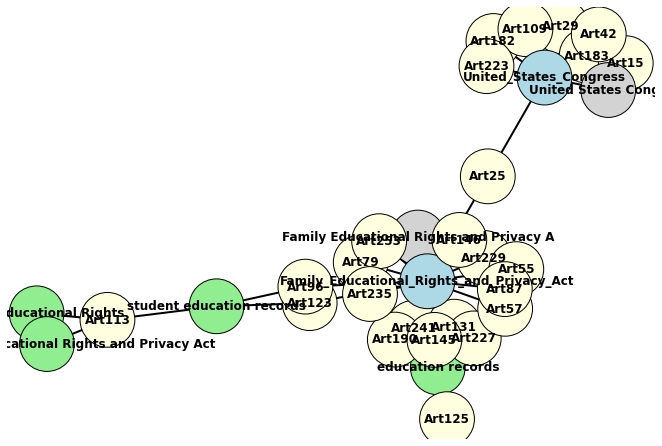

In [190]:
sg = buildMatchingGraph(G,query)

In [192]:
explainPath(sg,  'Art25', 'Art125')

['Art25', 'Family_Educational_Rights_and_Privacy_Act', 'Art131', 'education records', 'Art125']
----------------
Art25 ["FERPA was enacted by Congress to protect the privacy of students and their parents; The act is designed to ensure that students and parents of students may obtain access to the student's educational records and challenge the content or release of such records to third parties."]
----------------
Family_Educational_Rights_and_Privacy_Act 
----------------
Art131 ["FERPA gives parents and eligible students the right to: (1) review the student's education records maintained by the school; (2) request that a school correct records that they believe to be inaccurate or misleading; and (3) nondisclosure of the student's education record or personally identifiable information from the ."]
----------------
education records 
----------------
Art125 ["DecFERPA protects college students' education records so they remain confidential between the college and student; How involve

In [254]:
import people_also_ask

In [266]:
q1 = query = "Which extinction events were caused by asteroid impacts?"


In [267]:
questions = people_also_ask.get_related_questions(q1,4)

In [269]:
questions

['When did the 5 major extinctions occur?Search for: When did the 5 major extinctions occur?',
 'When did the 5 mass extinctions occur?Search for: When did the 5 mass extinctions occur?',
 'What caused each mass extinction?Search for: What caused each mass extinction?',
 'What were the 6 extinction events?Search for: What were the 6 extinction events?',
 'What were the 5 major extinction events?Search for: What were the 5 major extinction events?']

In [270]:
questions[2].split('Search')[0]

'What caused each mass extinction?'

In [255]:
ind_act_ques = []
for q in questions:
    ind_act_ques.append(act+": PAA: "+q)

SyntaxError: invalid syntax (<ipython-input-255-667d5f87a9c3>, line 1)

In [271]:
people_also_ask.get_answer(questions[2].split('Search')[0])

{'has_answer': True,
 'question': 'What caused each mass extinction?',
 'related_questions': ['What were the causes of each mass extinction?Search for: What were the causes of each mass extinction?',
  'What are the 4 main causes of mass extinctions?Search for: What are the 4 main causes of mass extinctions?',
  'What caused the 6 mass extinction?Search for: What caused the 6 mass extinction?',
  'What are the 5 mass extinctions on Earth?Search for: What are the 5 mass extinctions on Earth?'],
 'response': 'Past mass extinctions were caused by extreme temperature changes, rising or falling sea levels and catastrophic, one-off events like a huge volcano erupting or an asteroid hitting Earth. We know about them because we can see how life has changed in the fossil record.May 19, 2021',
 'heading': 'Past mass extinctions were caused by extreme temperature changes, rising or falling sea levels and catastrophic, one-off events like a huge volcano erupting or an asteroid hitting Earth. We kn

In [272]:
query = questions[2].split('Search')[0]
top_k = 4
norms = find_best_conv (top_k, query, matrix, matrix_conv, keys, G, show = False)
display_results (top_k, query, norms, keys, sentences)

7 nodes out of 7 matched the max value of  1
**************************************************
4  Top Answers for Query:  What caused each mass extinction?
Matching Node:  Art426
Query Answer Sentence:  Megafauna extinction in Australia occurred within the last million years, directly after known human settlement.
Matching Score:  0.0
------------------------------
Matching Node:  Art425
Query Answer Sentence:  The extinction of the megafauna, land animals weighing up to 45kg, has been attributed to human colonisation.
Matching Score:  0.0
------------------------------
Matching Node:  Art424
Query Answer Sentence:  Although there are countless specific examples of particular species that have become extinct due to reasons directly related to human activity, the extinction of earth's megafauna is the most poignant.
Matching Score:  0.0
------------------------------
Matching Node:  Art423
Query Answer Sentence:  This translates into approximately 18% of mammals, 11% of birds, 5% of fi

In [566]:
import json
with open(r"C:\Users\akumar33\OneDrive - North Carolina State University\NCSU\CSC591 GDM\P-2\WIKI_INFOBOX_FOLDER_PATH\act_infoboxes_AK.json") as file:
    ak = json.load(file)

In [567]:
import json
with open(r"C:\Users\akumar33\OneDrive - North Carolina State University\NCSU\CSC591 GDM\P-2\WIKI_INFOBOX_FOLDER_PATH\act_infoboxes_CL.json") as file2:
    cl = json.load(file2)

In [579]:
for i in cl:
    for k,v in i.items():
        if k=='name' or v=='fullname':
            print(i)

{'name': '', 'fullname': '', 'nicknames': 'Federal Deposit Insurance Act Amendments', 'enacted by': '91st', 'effective date': 'October 26, 1970', 'public law url': 'http://www.gpo.gov/fdsys/pkg/STATUTE-84/pdf/STATUTE-84-Pg1114-2.pdf', 'cite public law': '91-508', 'cite statutes at large': "{{usstat|84|1114-2}} ''aka'' 84 Stat. 1127", 'acts amended': '', 'title amended': '{{unbulleted list|[[Title 12 of the United States Code|12 U.S.C.: Banks and Banking]]|[[Title 15 of the United States Code|15 U.S.C.: Commerce and Trade]]}}', 'leghisturl': '', 'introducedin': 'House', 'introducedbill': '{{USBill|91|H.R.|15073}}', 'introducedby': '', 'introduceddate': '', 'committees': '', 'passedbody1': 'House', 'passeddate1': 'May 25, 1970', 'passedvote1': '[http://www.govtrack.us/congress/votes/91-1970/h255 302–0]', 'passedbody2': '', 'passeddate2': '', 'passedvote2': '', 'agreedbody3': '', 'agreeddate3': '', 'agreedvote3': '', 'signedpresident': '[[Richard Nixon]]', 'signeddate': 'October 26, 1970'

In [578]:
for k,v in cl[0].items():
    print(k)

name
fullname
nicknames
enacted by
effective date
public law url
cite public law
cite statutes at large
acts amended
title amended
leghisturl
introducedin
introducedbill
introducedby
introduceddate
committees
passedbody1
passeddate1
passedvote1
passedbody2
passeddate2
passedvote2
agreedbody3
agreeddate3
agreedvote3
signedpresident
signeddate
act
